# Problem Statement

#### Peer-to-Peer (P2P) lending platforms have gained popularity as alternative financial channels that connect borrowers and investors directly, eliminating the need for traditional intermediaries like banks. To make informed investment decisions and assess the risk associated with lending, it is crucial to analyze the available data on loan listings.

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mstats
import plotly.express as px
import pickle

from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score ,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline


In [2]:
df = pd.read_csv('/content/prosperLoanData.csv')

# Explore the data


In [3]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
# show Columns with missing values
col_with_missing = [col for col in df.columns
                   if df[col].isnull().any()]

for column in df[col_with_missing]:
    print(f' column {column} : {df[column].isna().sum()}')


 column CreditGrade : 84984
 column ClosedDate : 58848
 column BorrowerAPR : 25
 column EstimatedEffectiveYield : 29084
 column EstimatedLoss : 29084
 column EstimatedReturn : 29084
 column ProsperRating (numeric) : 29084
 column ProsperRating (Alpha) : 29084
 column ProsperScore : 29084
 column BorrowerState : 5515
 column Occupation : 3588
 column EmploymentStatus : 2255
 column EmploymentStatusDuration : 7625
 column GroupKey : 100596
 column CreditScoreRangeLower : 591
 column CreditScoreRangeUpper : 591
 column FirstRecordedCreditLine : 697
 column CurrentCreditLines : 7604
 column OpenCreditLines : 7604
 column TotalCreditLinespast7years : 697
 column InquiriesLast6Months : 697
 column TotalInquiries : 1159
 column CurrentDelinquencies : 697
 column AmountDelinquent : 7622
 column DelinquenciesLast7Years : 990
 column PublicRecordsLast10Years : 697
 column PublicRecordsLast12Months : 7604
 column RevolvingCreditBalance : 7604
 column BankcardUtilization : 7604
 column AvailableBa

In [6]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


#  Handling missing values

In [7]:
# Columns with large missing values in numerical columns
Records_num = df.shape[0]
drop_col=[]
for val in df:
    missing_cells = df[val].isnull().sum()
    percent = (missing_cells.sum() / Records_num) * 100
    if percent >= 70 :
        drop_col.append(val)
        print(f'the missing values percent in Col {val} ----> {percent.round()} ')

print(drop_col)

the missing values percent in Col CreditGrade ----> 75.0 
the missing values percent in Col GroupKey ----> 88.0 
the missing values percent in Col TotalProsperLoans ----> 81.0 
the missing values percent in Col TotalProsperPaymentsBilled ----> 81.0 
the missing values percent in Col OnTimeProsperPayments ----> 81.0 
the missing values percent in Col ProsperPaymentsLessThanOneMonthLate ----> 81.0 
the missing values percent in Col ProsperPaymentsOneMonthPlusLate ----> 81.0 
the missing values percent in Col ProsperPrincipalBorrowed ----> 81.0 
the missing values percent in Col ProsperPrincipalOutstanding ----> 81.0 
the missing values percent in Col ScorexChangeAtTimeOfListing ----> 83.0 
the missing values percent in Col LoanFirstDefaultedCycleNumber ----> 85.0 
['CreditGrade', 'GroupKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOuts

In [8]:
#copy from the original data
df_copy = df.copy()

In [9]:
# drop the columns with high percent missing

df_copy = df_copy.drop(columns=drop_col)

In [10]:
df_copy.shape

(113937, 70)

In [11]:
# categorical _columns

categorical_col =df_copy.select_dtypes(exclude ='number').columns
categorical_col

Index(['ListingKey', 'ListingCreationDate', 'LoanStatus', 'ClosedDate',
       'ProsperRating (Alpha)', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'IsBorrowerHomeowner', 'CurrentlyInGroup',
       'DateCreditPulled', 'FirstRecordedCreditLine', 'IncomeRange',
       'IncomeVerifiable', 'LoanKey', 'LoanOriginationDate',
       'LoanOriginationQuarter', 'MemberKey'],
      dtype='object')

In [12]:
# Drop rows with missing values in specific columns

columns_to_drop_na = ["EstimatedEffectiveYield", "EstimatedLoss", "EstimatedReturn"]

df_copy.dropna(subset=columns_to_drop_na, inplace=True)

In [13]:
df_copy.shape

(84853, 70)

In [14]:
# the column with missing values after drop some records and columns
col_with_missing = [col for col in df_copy.columns
                   if df_copy[col].isnull().any()]

for column in df_copy[col_with_missing]:
    print(f' column {column} : {df_copy[column].isna().sum()}')

 column ClosedDate : 58848
 column Occupation : 1333
 column EmploymentStatusDuration : 19
 column DebtToIncomeRatio : 7296


In [15]:
# drop ClosedDate column with approximate 60k missing value
df_copy = df_copy.drop('ClosedDate', axis=1)

In [16]:
# Count the number of duplicated records
num_duplicates = df_copy.duplicated().sum()

# Print the number of duplicated records
print(f"The number of duplicated records in the DataFrame is: {num_duplicates}")


The number of duplicated records in the DataFrame is: 0


In [17]:
df_copy.shape

(84853, 69)

<Axes: xlabel='count', ylabel='Occupation'>

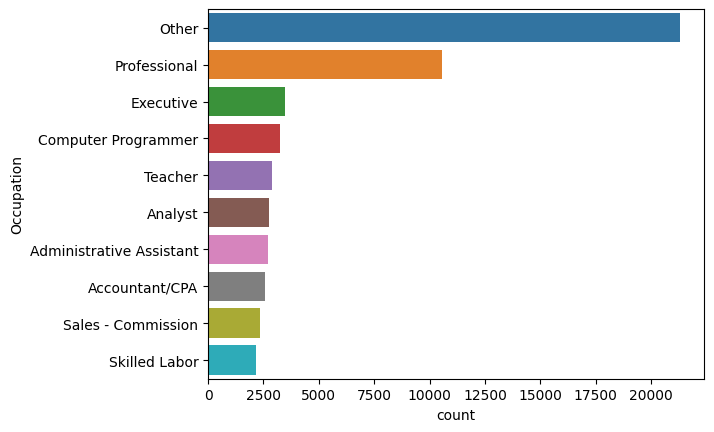

In [18]:
# show the largest 10 values in Occupation column

top_10_occupations = df_copy['Occupation'].value_counts().nlargest(10).index
sns.countplot(data=df_copy , y='Occupation',order=top_10_occupations)

In [19]:
df_copy['Occupation'].nunique()

67

In [20]:
df_copy['Occupation'].fillna('Other', inplace=True)

In [21]:
# LoanAccepted my target column in the dataset
df_copy['LoanAccepted'] = df_copy['LoanStatus'].apply(lambda x: 1 if x in ['Completed', 'Current'] else 0)


In [22]:
df_copy.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,LoanAccepted
52087,65923540040008201487E7C,559505,2012-02-16 13:14:46.207000000,36,Chargedoff,0.33553,0.2958,0.2858,0.27270,0.1470,...,-106.34,3031.30,3031.30,0.0,1.0,0,0,0.0,85,0
85553,23CE3503601685396BD2AD0,488664,2010-12-21 12:54:46.813000000,36,Current,0.12400,0.1029,0.0929,0.09260,0.0260,...,-27.54,0.00,0.00,0.0,1.0,0,0,0.0,41,1
64275,0FAB35399214836722109D7,559361,2012-02-16 08:10:06.067000000,36,Current,0.22456,0.1874,0.1774,0.17330,0.0650,...,0.00,0.00,0.00,0.0,1.0,1,0,0.0,82,1
25118,900E3599185898764FC777C,1096919,2013-12-26 11:49:05.817000000,60,Current,0.29567,0.2694,0.2594,0.23608,0.1375,...,0.00,0.00,0.00,0.0,1.0,0,0,0.0,4,1
95490,C341347149826382537D869,438393,2009-12-14 20:34:55.833000000,36,Completed,0.07990,0.0765,0.0665,0.05350,0.0130,...,0.00,0.00,0.00,0.0,1.0,0,0,0.0,96,1
35146,034034900620925126BD5DF,469427,2010-07-31 07:55:15.010000000,36,Completed,0.17322,0.1515,0.1415,0.07960,0.0595,...,0.00,0.00,0.00,0.0,1.0,0,0,0.0,394,1
7289,69613577899816503736D0E,763330,2013-04-29 10:50:36.233000000,36,Past Due (31-60 days),0.18214,0.1459,0.1359,0.12920,0.0474,...,-424.80,0.00,0.00,0.0,1.0,0,0,0.0,1,0
6330,9D9B3547652480752D8FDE0,595303,2012-06-01 18:16:11.130000000,60,Current,0.31375,0.2870,0.2770,0.27010,0.1190,...,0.00,0.00,0.00,0.0,1.0,0,0,0.0,75,1
4648,06B2359529846191878ECD1,996955,2013-11-15 12:51:23.740000000,60,Current,0.20808,0.1840,0.1740,0.16214,0.0749,...,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1,1
66580,0520350880449303233D5F7,497038,2011-03-08 08:22:53.867000000,36,Chargedoff,0.29510,0.2599,0.2499,0.24370,0.1080,...,-8.50,4308.15,4308.15,0.0,1.0,0,0,0.0,81,0


In [23]:
# 1 the loan is accepted
# 0 the loan refused
df_copy['LoanAccepted'].value_counts()

1    76240
0     8613
Name: LoanAccepted, dtype: int64

# Preprocessing

## Handling outliers using winsorization

In [24]:
numeric_col = df_copy.select_dtypes(include='number').columns
print(len(numeric_col))
numeric_col = numeric_col.drop(['LoanAccepted'], errors='ignore')
print(len(numeric_col))

53
52


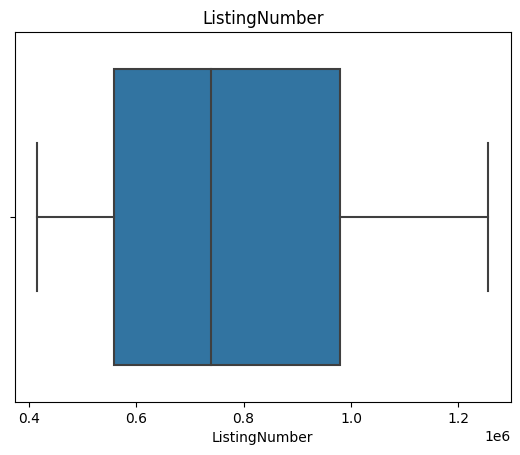

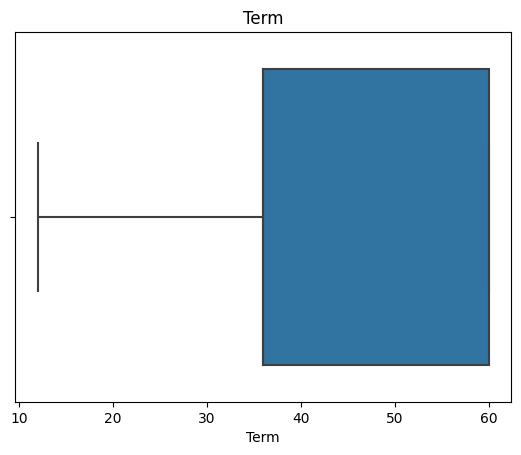

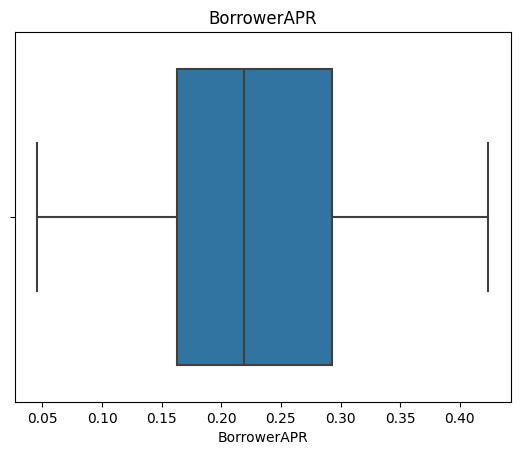

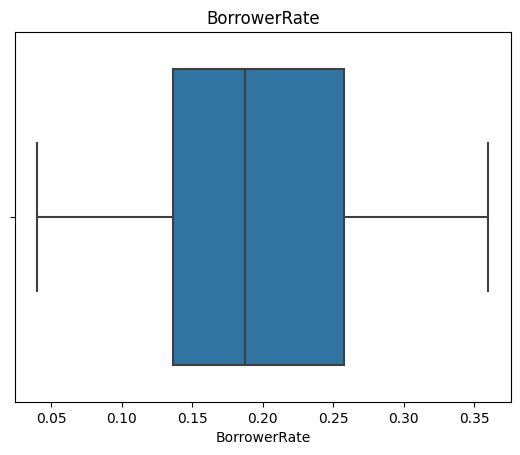

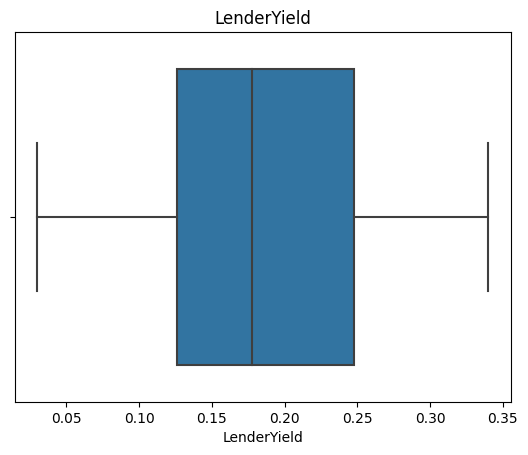

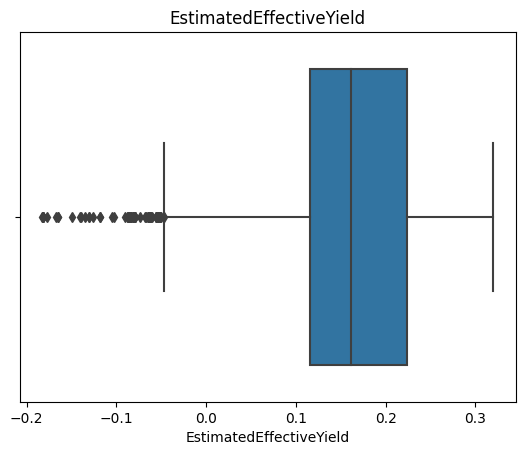

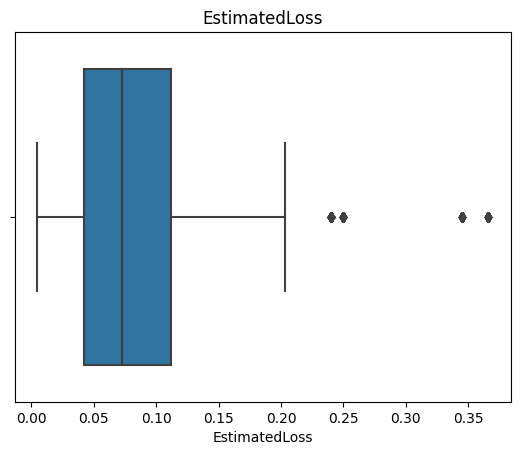

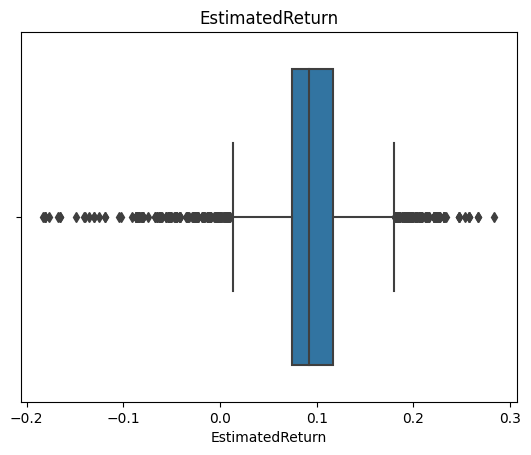

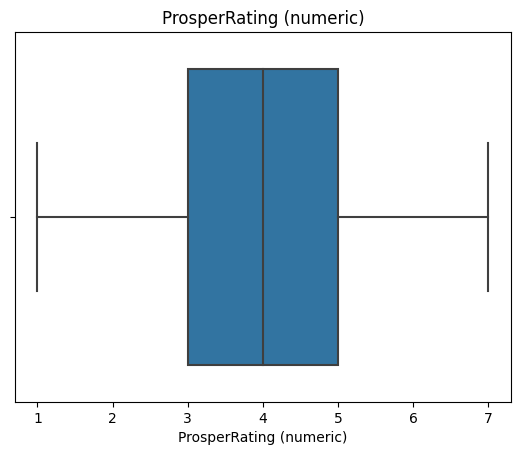

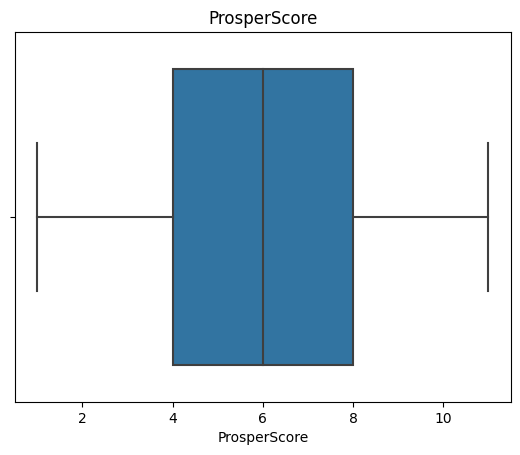

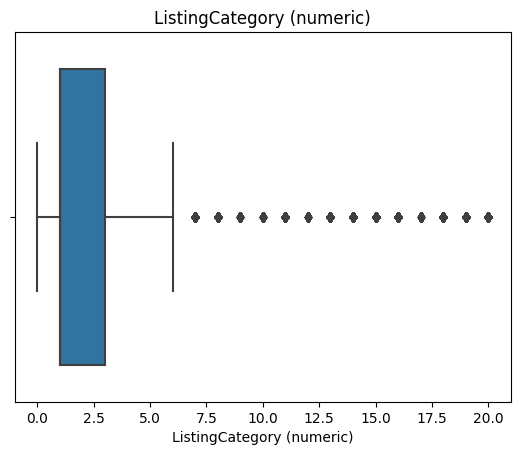

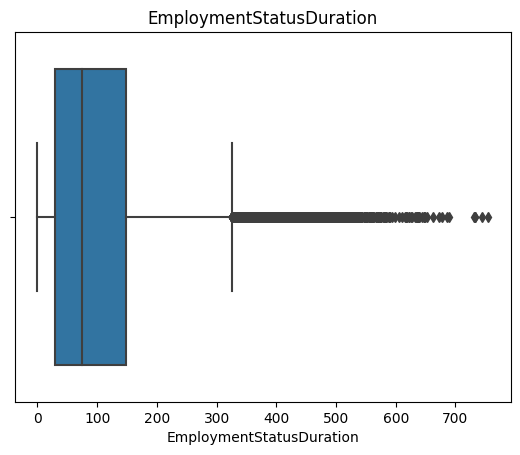

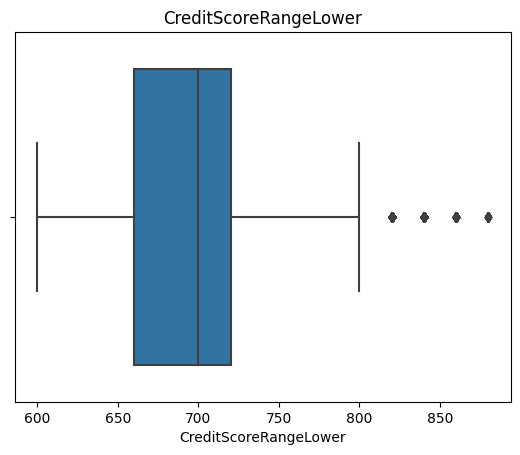

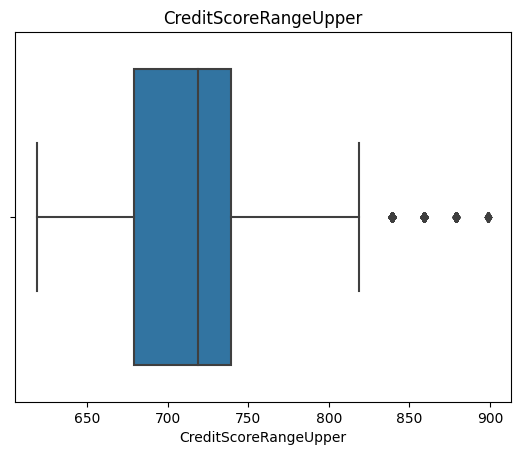

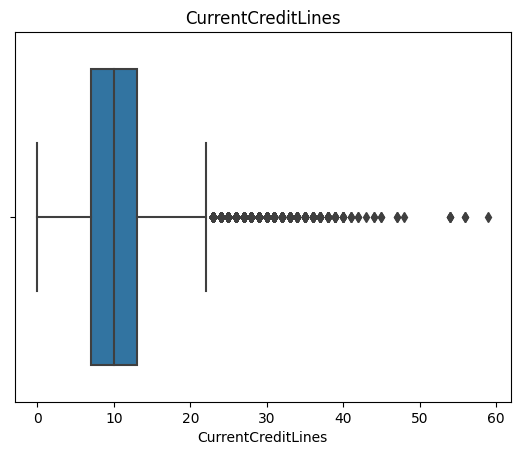

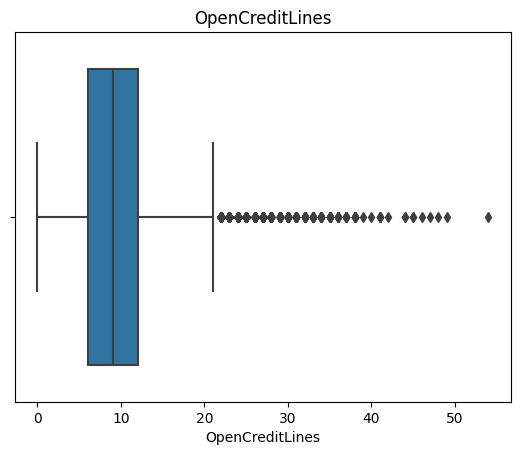

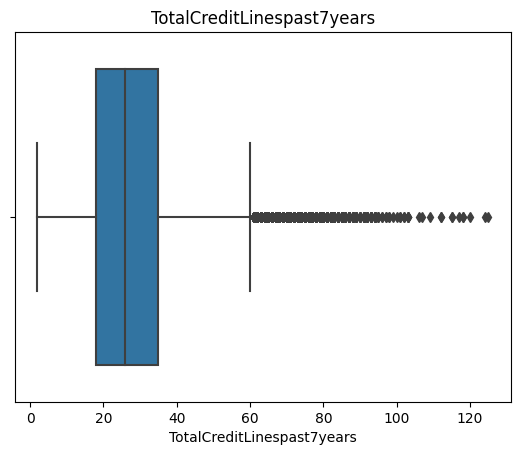

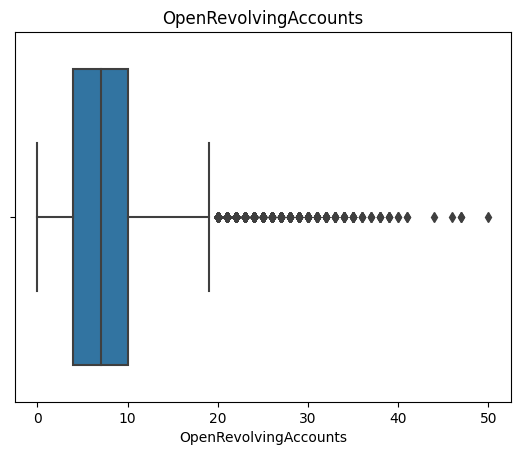

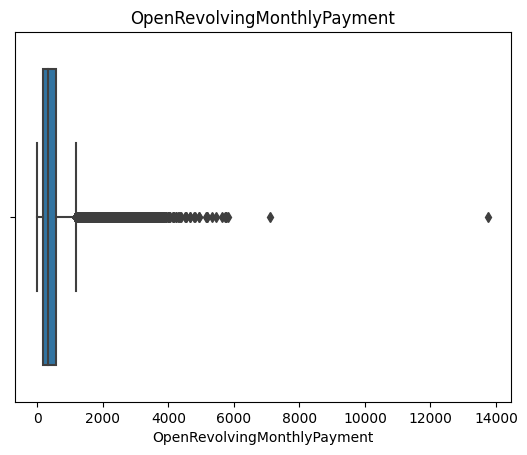

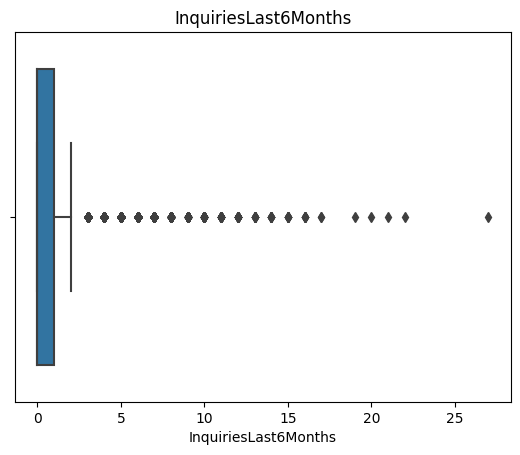

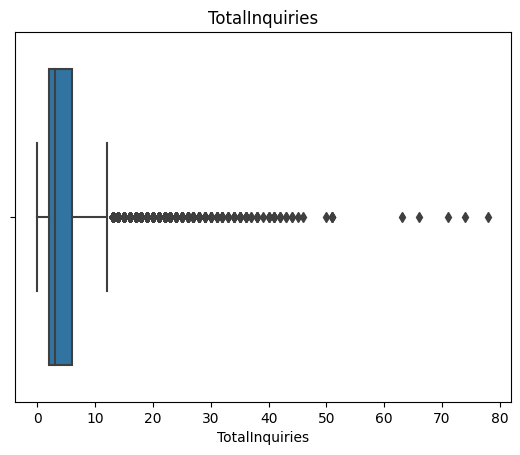

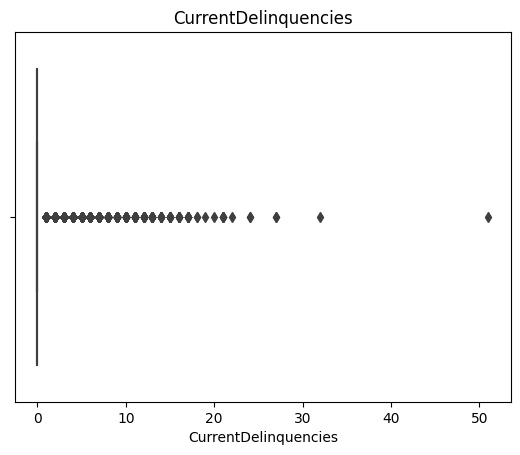

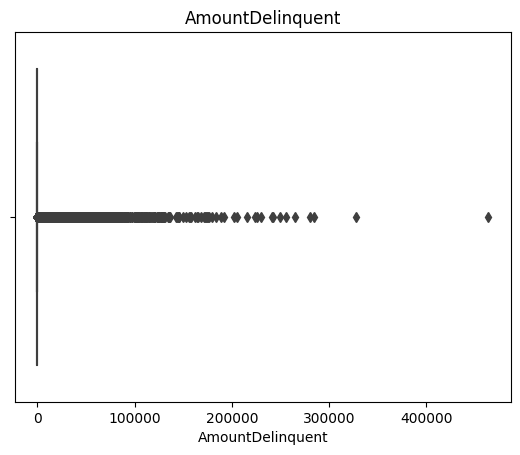

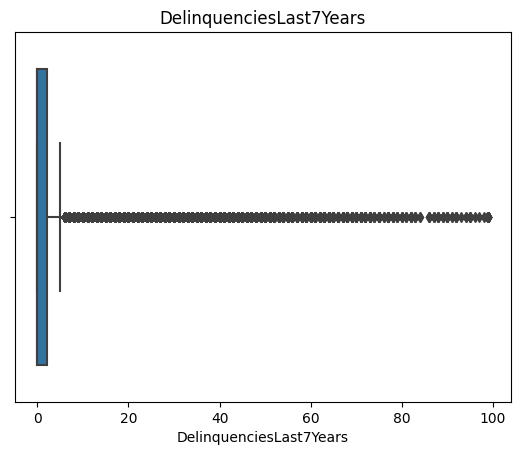

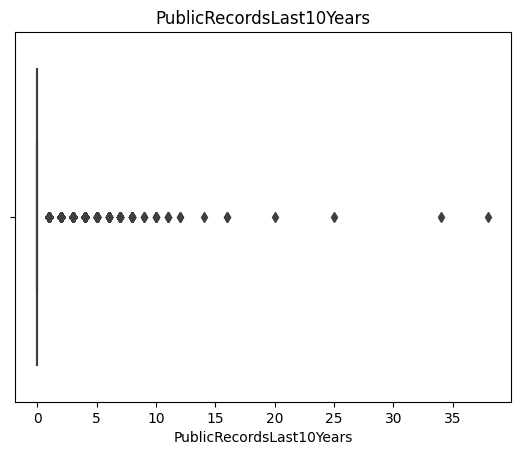

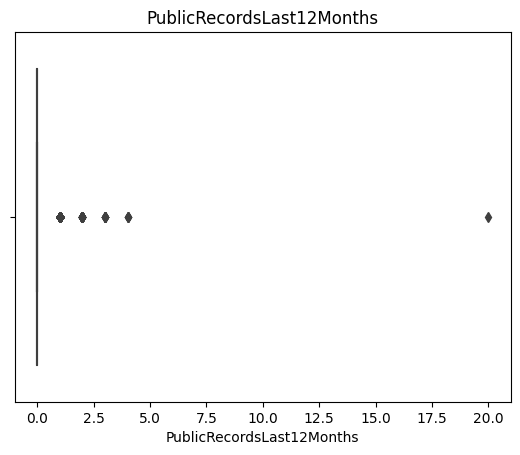

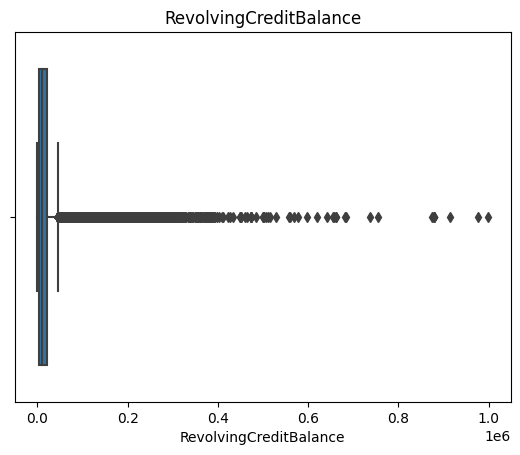

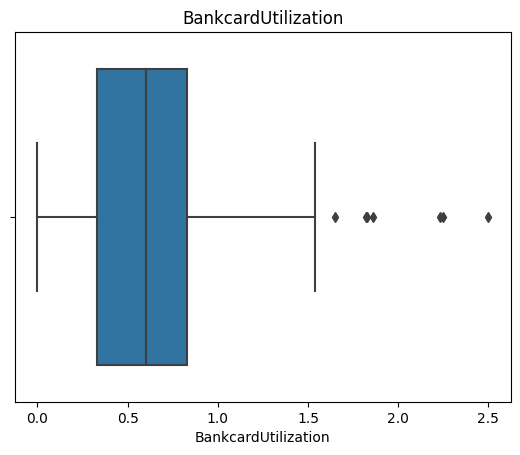

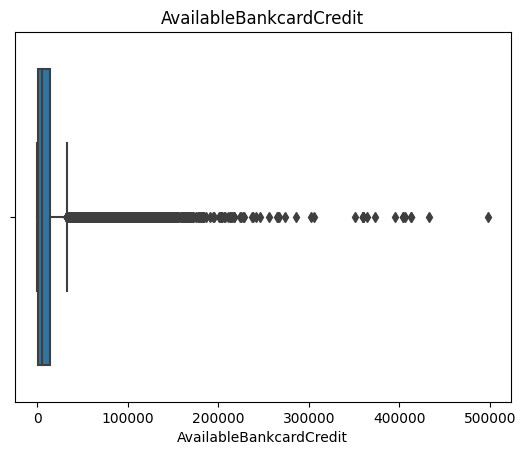

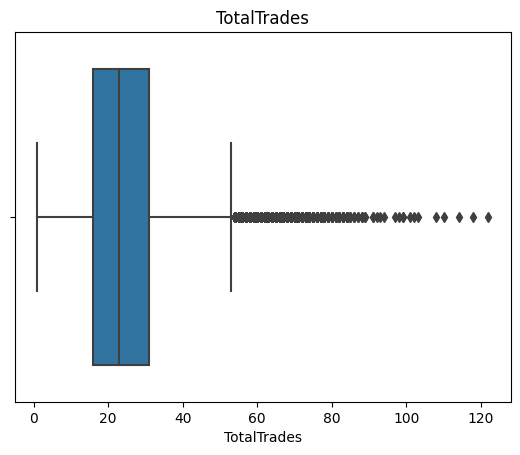

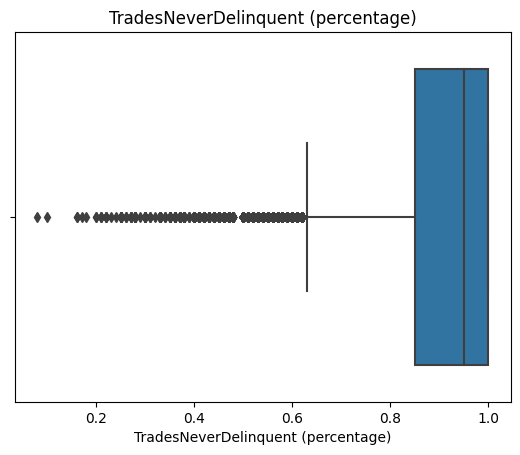

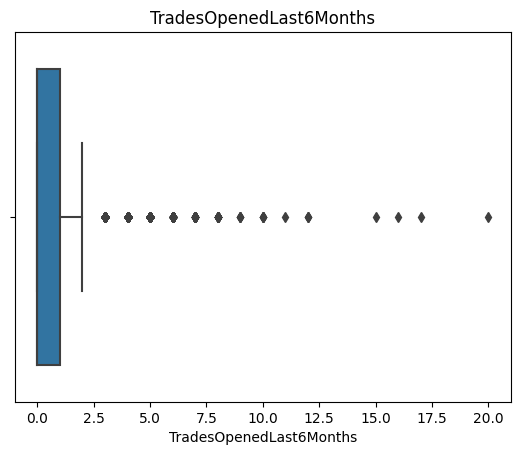

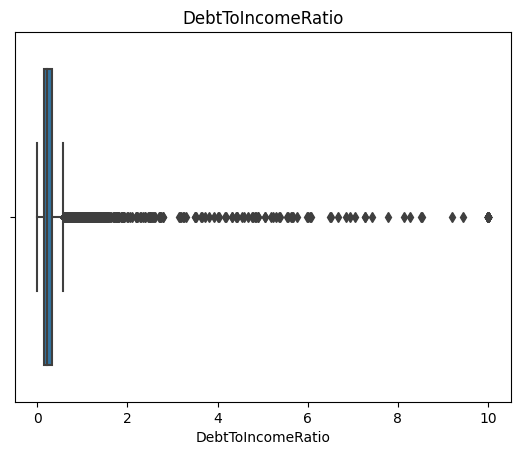

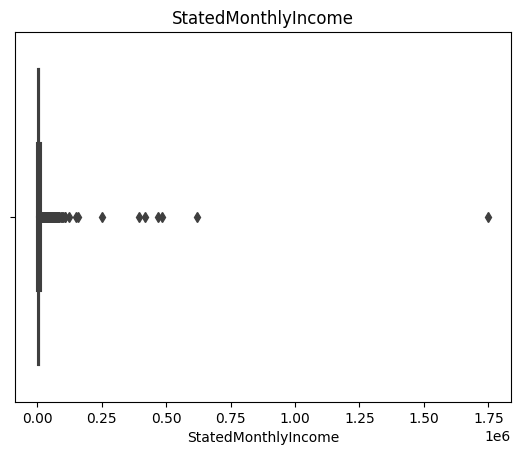

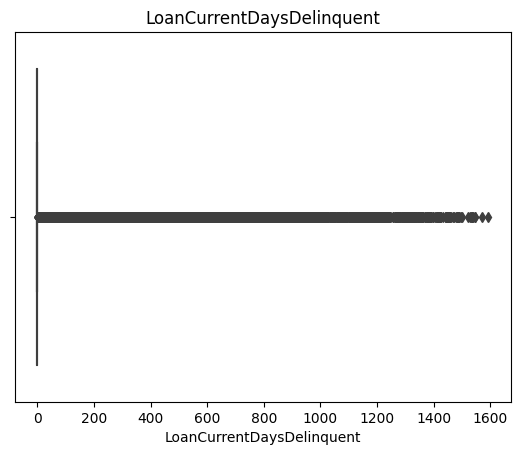

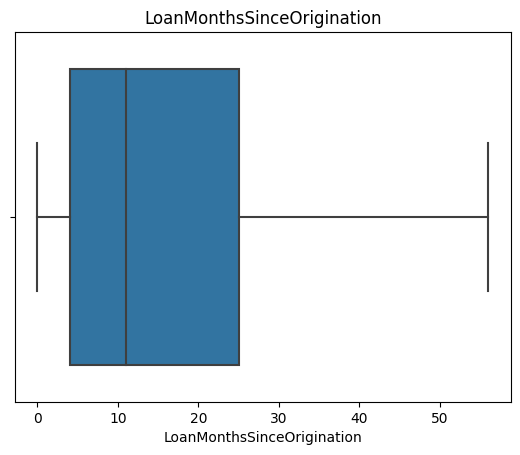

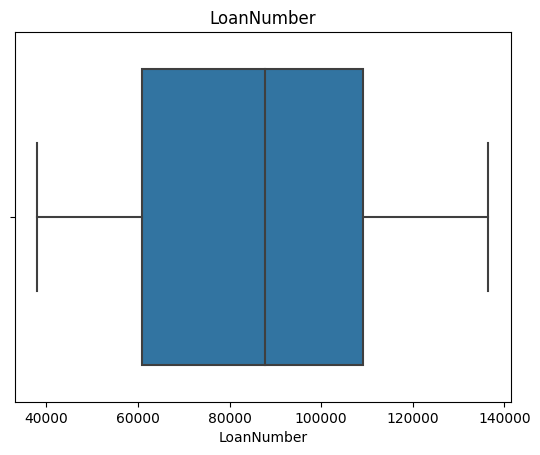

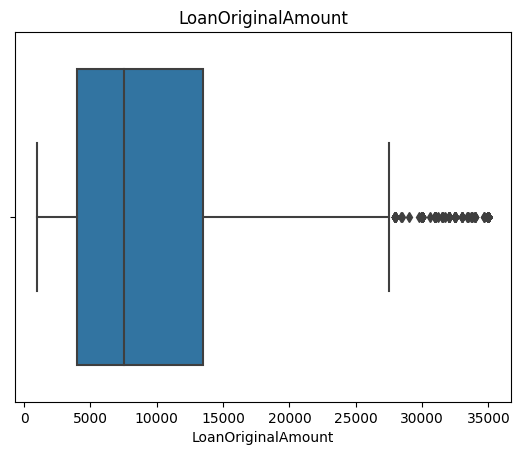

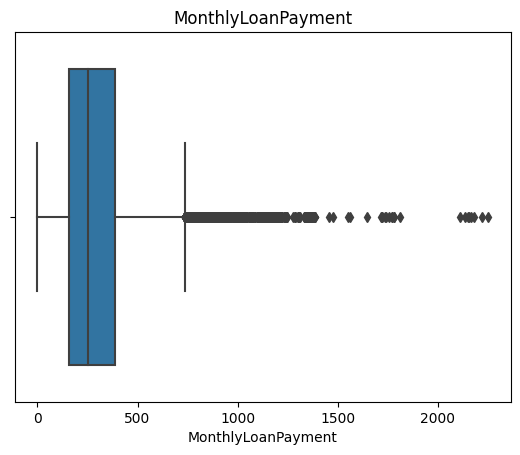

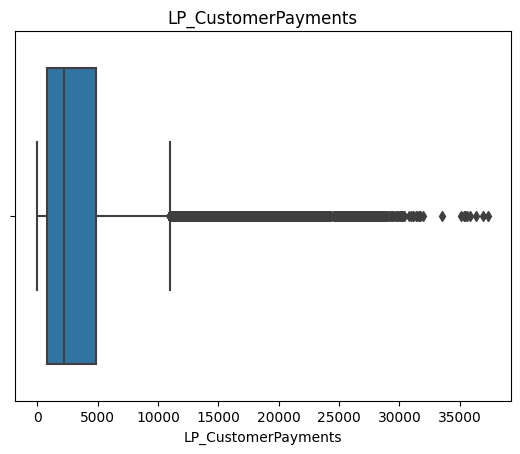

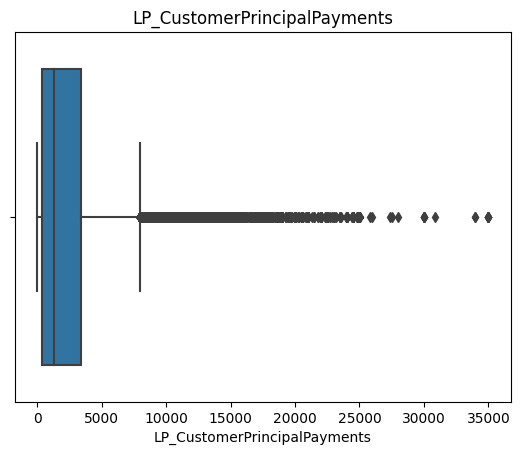

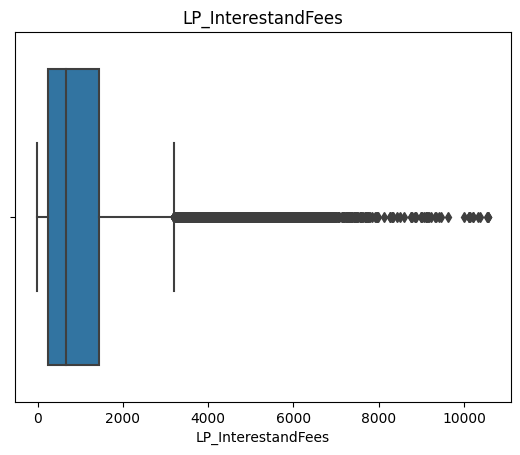

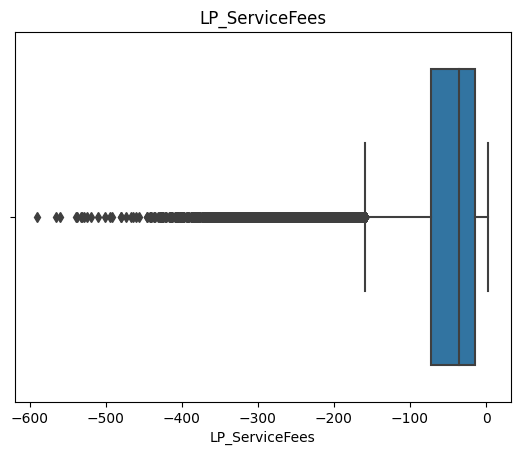

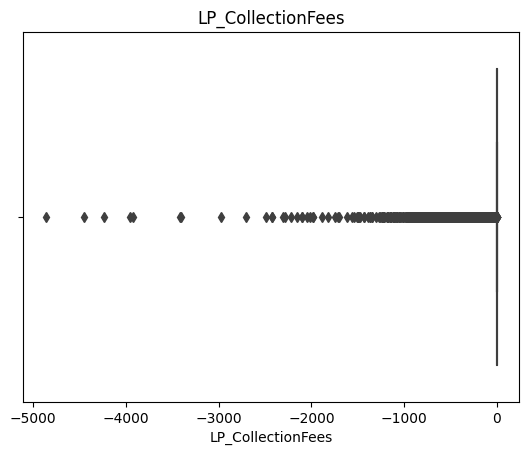

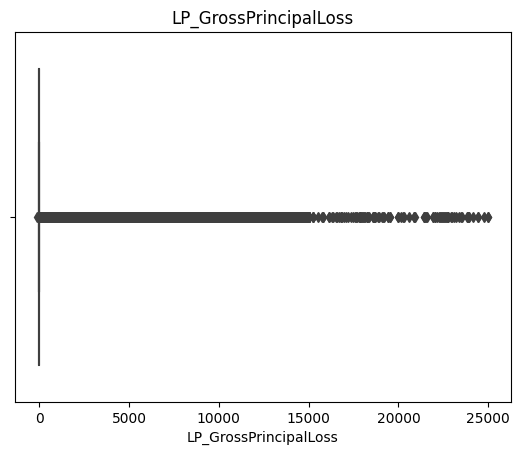

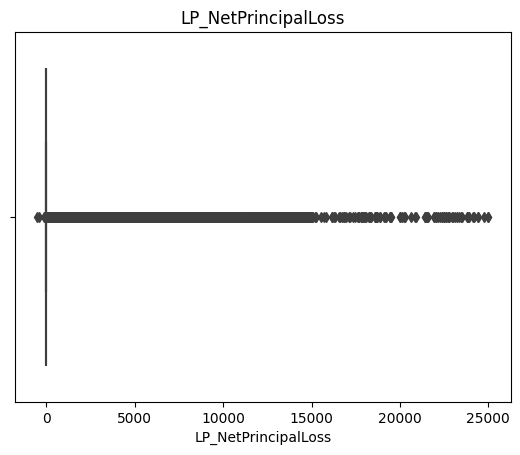

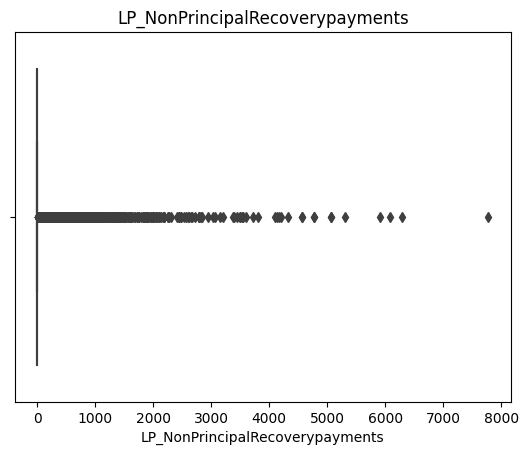

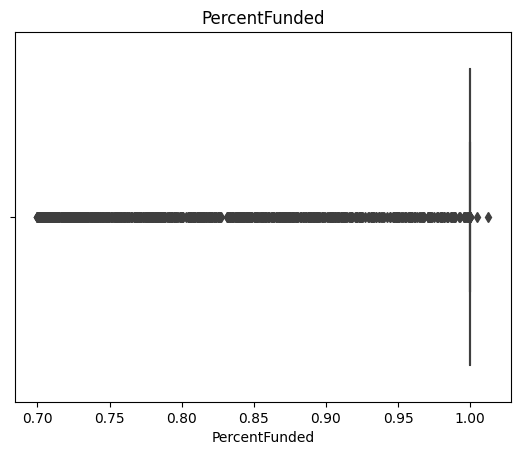

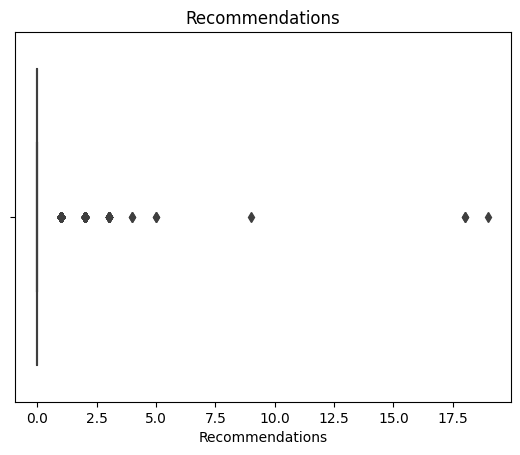

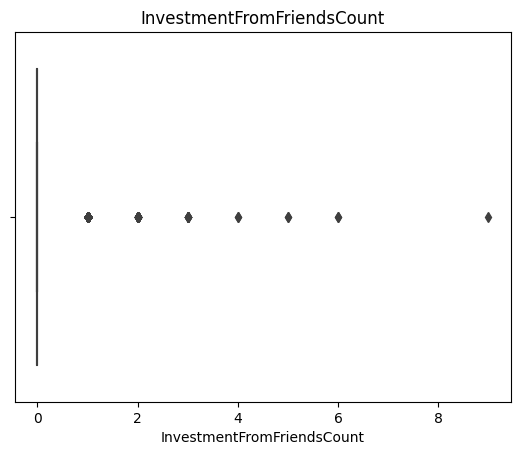

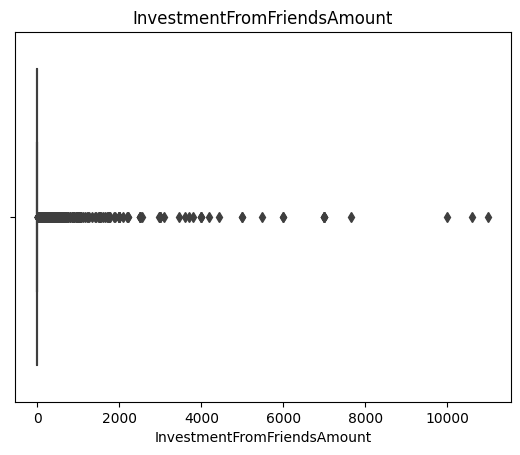

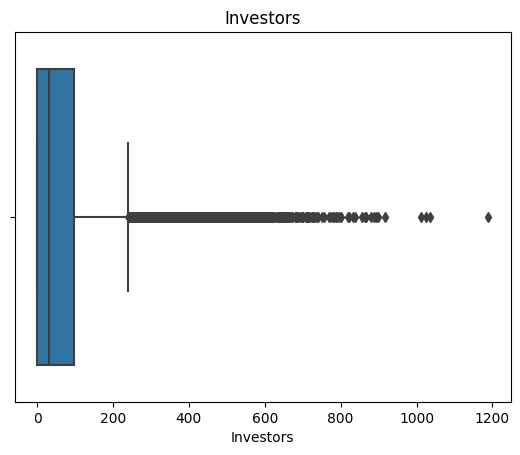

In [25]:
# show the boxplot of the data
for col in numeric_col:
    sns.boxplot(x=df_copy[col])
    plt.title(col)
    plt.show()

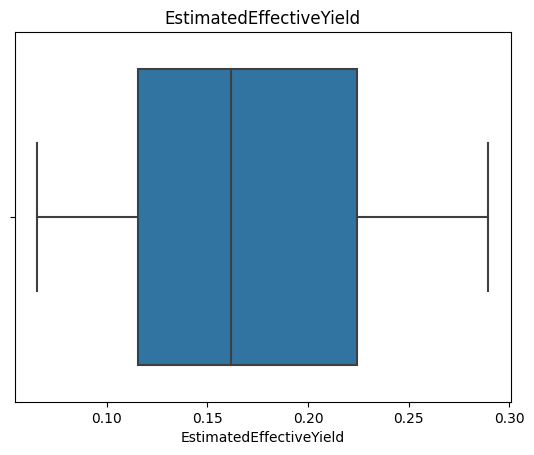

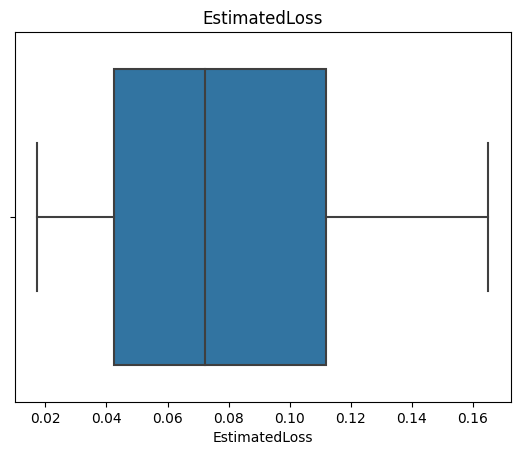

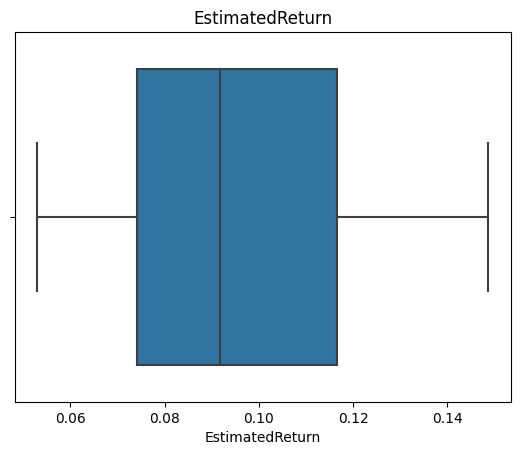

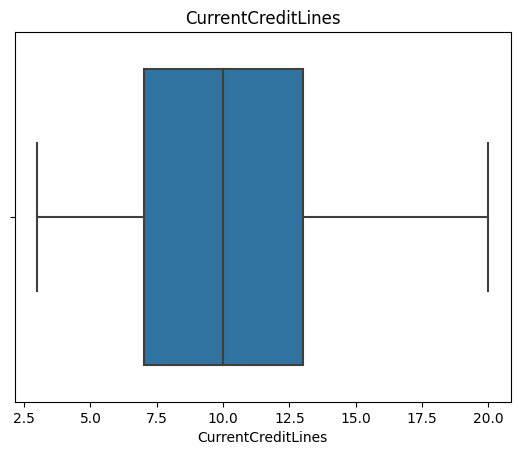

In [26]:
df_cleaned = df_copy.copy()

# Winsorize the numerical columns
df_cleaned[numeric_col] = df_cleaned[numeric_col].apply(lambda x: mstats.winsorize(x, limits=[0.05, 0.05]))

# Display a sample after Winsorization
columns = ['EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn','CurrentCreditLines']

# Create a boxplot for a sample
for col in columns:
    sns.boxplot(x=df_cleaned[col])
    plt.title(col)
    plt.show()

In [27]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ListingKey                          84853 non-null  object 
 1   ListingNumber                       84853 non-null  int64  
 2   ListingCreationDate                 84853 non-null  object 
 3   Term                                84853 non-null  int64  
 4   LoanStatus                          84853 non-null  object 
 5   BorrowerAPR                         84853 non-null  float64
 6   BorrowerRate                        84853 non-null  float64
 7   LenderYield                         84853 non-null  float64
 8   EstimatedEffectiveYield             84853 non-null  float64
 9   EstimatedLoss                       84853 non-null  float64
 10  EstimatedReturn                     84853 non-null  float64
 11  ProsperRating (numeric)             8485

In [28]:
# fill the null values in column DebtToIncomeRatio
df_cleaned['DebtToIncomeRatio'].fillna(df_cleaned['DebtToIncomeRatio'].median(), inplace=True)

In [29]:
#missing value percent
total_cells = np.product(df_cleaned.shape)
missing_cells = df_cleaned.isnull().sum()
percent = (missing_cells.sum() / total_cells) * 100
percent

0.0

In [30]:
df_cleaned.shape

(84853, 70)

In [31]:
# our target Var
df_cleaned['LoanAccepted'].value_counts()

1    76240
0     8613
Name: LoanAccepted, dtype: int64

# Exploring and Visualize the Data (EDA)


In [32]:
# make a new Data Frame to check the LoanStatus berfore 2009 by take subset from the orginal data frame
df_test = df[['LoanStatus','ListingCreationDate','LoanCurrentDaysDelinquent','CreditGrade','MonthlyLoanPayment']]
df_test

,LoanStatus,ListingCreationDate,LoanCurrentDaysDelinquent,CreditGrade,MonthlyLoanPayment
0,Completed,2007-08-26 19:09:29.263000000,0,C,330.43
1,Current,2014-02-27 08:28:07.900000000,0,NaN,318.93
2,Completed,2007-01-05 15:00:47.090000000,0,HR,123.32
3,Current,2012-10-22 11:02:35.010000000,0,NaN,321.45
4,Current,2013-09-14 18:38:39.097000000,0,NaN,563.97
...,...,...,...,...,...
113932,Current,2013-04-14 05:55:02.663000000,0,NaN,364.74
113933,FinalPaymentInProgress,2011-11-03 20:42:55.333000000,0,NaN,65.57
113934,Current,2013-12-13 05:49:12.703000000,0,NaN,273.35
113935,Completed,2011-11-14 13:18:26.597000000,0,NaN,449.55


In [33]:
df_test['ListingCreationDate_Year'] = pd.to_datetime(df_test['ListingCreationDate']).dt.year

# drop the Date columns
df_test.drop(['ListingCreationDate'], axis=1 , inplace = True)

df_test

<ipython-input-33-6571c3340e03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['ListingCreationDate_Year'] = pd.to_datetime(df_test['ListingCreationDate']).dt.year
<ipython-input-33-6571c3340e03>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(['ListingCreationDate'], axis=1 , inplace = True)


,LoanStatus,LoanCurrentDaysDelinquent,CreditGrade,MonthlyLoanPayment,ListingCreationDate_Year
0,Completed,0,C,330.43,2007
1,Current,0,NaN,318.93,2014
2,Completed,0,HR,123.32,2007
3,Current,0,NaN,321.45,2012
4,Current,0,NaN,563.97,2013
...,...,...,...,...,...
113932,Current,0,NaN,364.74,2013
113933,FinalPaymentInProgress,0,NaN,65.57,2011
113934,Current,0,NaN,273.35,2013
113935,Completed,0,NaN,449.55,2011


In [34]:
# the records in the Data Frame be between 2005 to 2009
df_test.dropna(subset=['CreditGrade'], inplace=True)

<ipython-input-34-7e16a1e62d51>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.dropna(subset=['CreditGrade'], inplace=True)


In [35]:
df_test

,LoanStatus,LoanCurrentDaysDelinquent,CreditGrade,MonthlyLoanPayment,ListingCreationDate_Year
0,Completed,0,C,330.43,2007
2,Completed,0,HR,123.32,2007
11,Completed,0,C,33.81,2007
17,Chargedoff,2239,AA,334.54,2006
21,Completed,0,D,112.64,2007
...,...,...,...,...,...
113921,Completed,0,AA,29.52,2005
113922,Completed,0,C,168.35,2008
113923,Completed,0,B,300.95,2008
113926,Defaulted,230,E,125.72,2006


In [36]:
# Q1 What are the most number of borrowers Credit Grade? Note( listings pre-2009 period )

credit_grade_counts = df_test['CreditGrade'].value_counts().reset_index()
credit_grade_counts.columns = ['CreditGrade', 'Count']

# Create the pie chart
fig = px.pie(credit_grade_counts, values='Count', names='CreditGrade',
             title='Credit Grade Distribution')

# Show the interactive pie chart
fig.show()

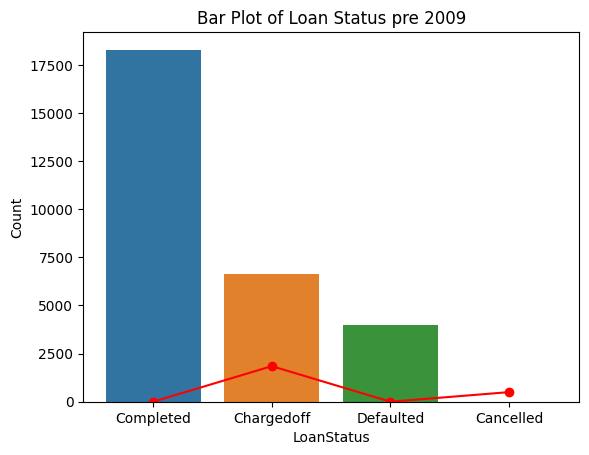

In [37]:
# Q2  does it lead to a higher amount of deliquency?
sns.countplot(data=df_test, x='LoanStatus')
plt.ylabel('Count')
plt.title('Bar Plot of Loan Status pre 2009')

# line chart to assign the mean of delinquncy of each Loan Status value
mean_values = df_test.groupby('LoanStatus')['LoanCurrentDaysDelinquent'].mean()
plt.plot(mean_values.index, mean_values.values, marker='o',c='r')

plt.show()

# so it does't lead to a higher amount of deliquency

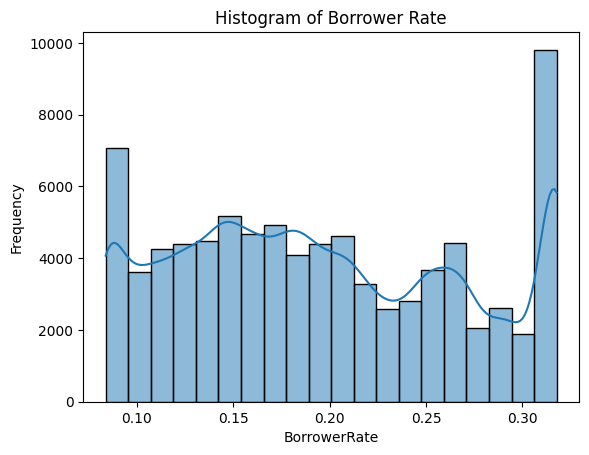

In [38]:
# Q3 What is the highest number of BorrowerRate?

sns.histplot(data=df_cleaned, x='BorrowerRate', kde=True , bins=20)

# Set labels and title
plt.xlabel('BorrowerRate')
plt.ylabel('Frequency')
plt.title('Histogram of Borrower Rate')

# Display the histogram
plt.show()

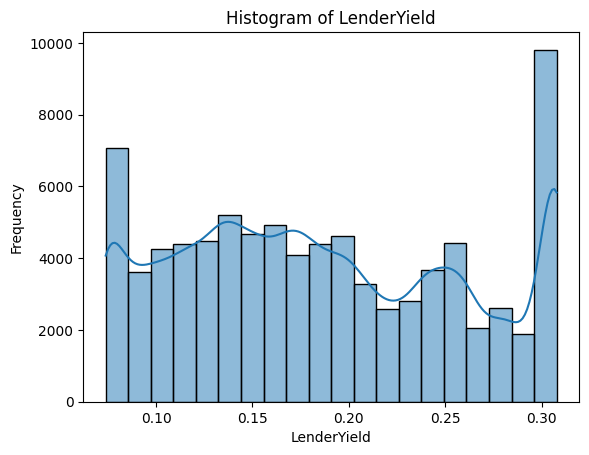

In [39]:
# Q4 What is the highest number of LenderYield?

sns.histplot(data=df_cleaned, x='LenderYield', kde=True , bins=20)

# Set labels and title
plt.xlabel('LenderYield')
plt.ylabel('Frequency')
plt.title('Histogram of LenderYield')

# Display the histogram
plt.show()

### so also the highest numbers of Lender Yield is between 0.1 and 0.2 like Borrower Rate

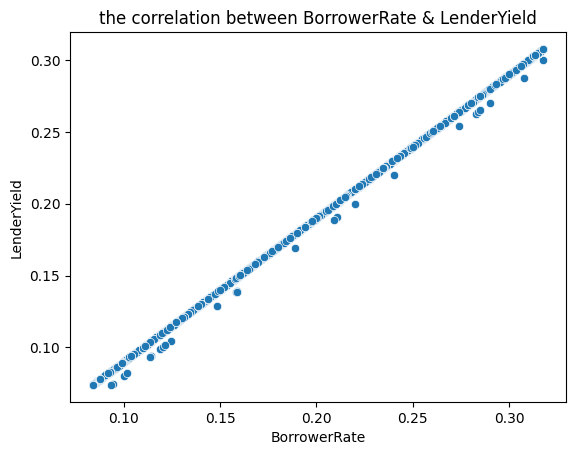

In [40]:
# the corr between BorrowerRate & LenderYield
sns.scatterplot(data=df_cleaned, x='BorrowerRate', y='LenderYield')
plt.title('the correlation between BorrowerRate & LenderYield')
plt.xlabel('BorrowerRate')
plt.ylabel('LenderYield')
plt.show()

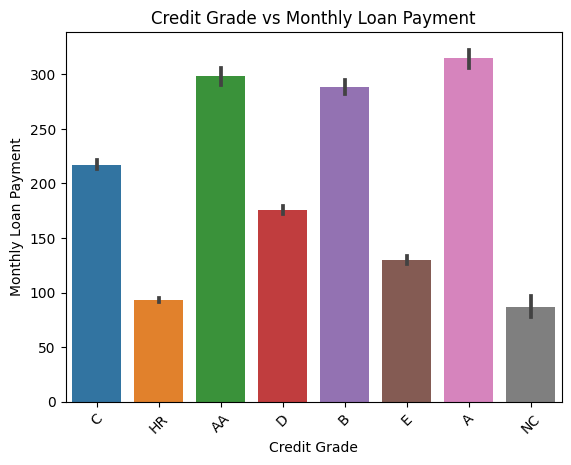

In [41]:
# Q5 Does higher Credit Grade leads to higher Monthly Loan Payment ?

# Create a bar plot
sns.barplot(x='CreditGrade', y='MonthlyLoanPayment', data=df_test)

# Set plot title and labels
plt.title('Credit Grade vs Monthly Loan Payment')
plt.xlabel('Credit Grade')
plt.ylabel('Monthly Loan Payment')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()


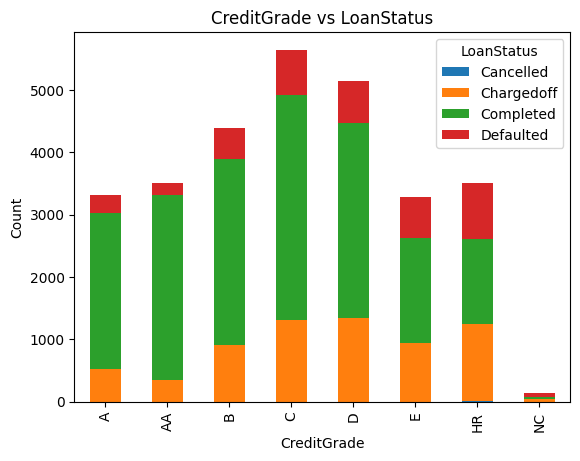

In [42]:
# Q6 Relatonship between CreditGrade and LoanStatus

# Group the data by 'CreditGrade' and 'LoanStatus' and calculate the count
grouped_data = df.groupby(['CreditGrade', 'LoanStatus']).size().unstack()

# Plot the stacked bar graph
grouped_data.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('CreditGrade')
plt.ylabel('Count')
plt.title('CreditGrade vs LoanStatus')

# Show the plot
plt.show()

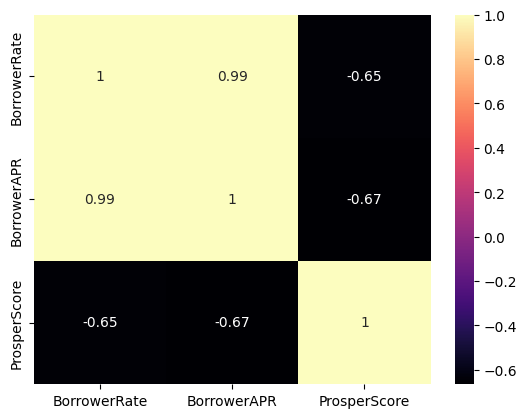

In [43]:
# Multivariate Relationship between BorrowerRate and BorrowerAPR and ProperScore
arr = df_cleaned[['BorrowerRate','BorrowerAPR','ProsperScore']]
corr = arr.corr()

sns.heatmap(corr, annot=True, cmap='magma')
plt.show()


# so there is a strong +ve correlation between 'BorrowerRate','BorrowerAPR' and strong -ve correlation between ProsperScore

In [44]:
# which states have most Borrowers requests ?

# Define a custom color palette
colors = px.colors.qualitative.Set3

# Calculate the count of borrowers by state
state_counts = df_cleaned['BorrowerState'].value_counts().reset_index()
state_counts.columns = ['BorrowerState', 'Count']

# Create the treemap with custom colors
fig = px.treemap(state_counts, path=['BorrowerState'], values='Count',
                 color='Count', color_continuous_scale=colors)

# Show the interactive treemap
fig.show()


In [45]:
df_cleaned['IncomeRange'].value_counts()

$50,000-74,999    25627
$25,000-49,999    24175
$100,000+         15205
$75,000-99,999    14498
$1-24,999          4654
Not employed        649
$0                   45
Name: IncomeRange, dtype: int64

In [46]:
df_cleaned['IncomeRange'] = df_cleaned['IncomeRange'].replace('Not employed', '$0')


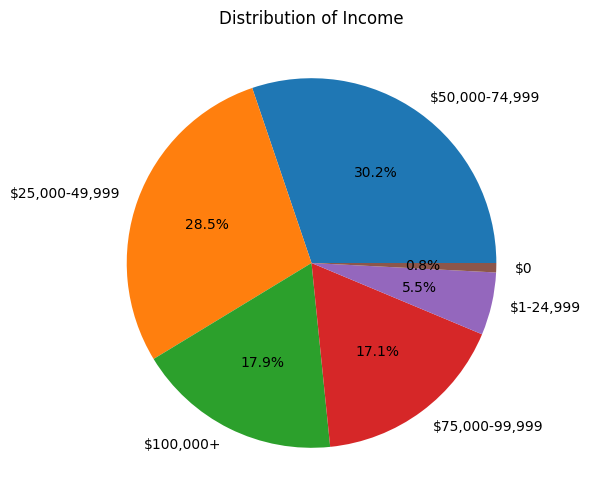

In [47]:
# Income range graph

income_counts = df_cleaned['IncomeRange'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%')

# Add a title
plt.title('Distribution of Income')

# Display the chart
plt.show()

## some bi-ivariate graphs

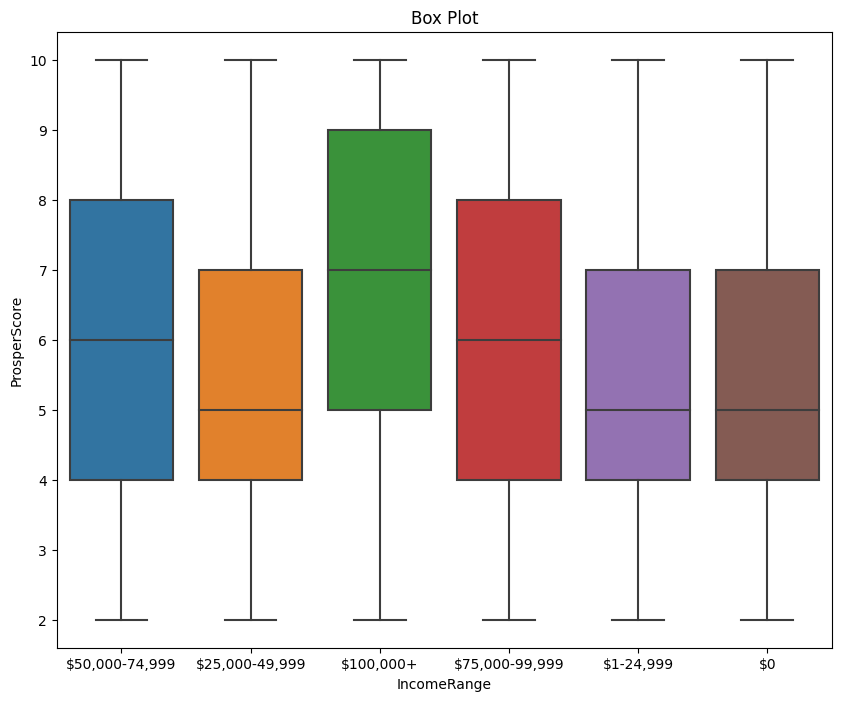

In [48]:
# Plot a box plot between a numerical column and a categorical column
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_cleaned, x='IncomeRange', y='ProsperScore')
plt.title('Box Plot')
plt.xlabel('IncomeRange')
plt.ylabel('ProsperScore')
plt.show()

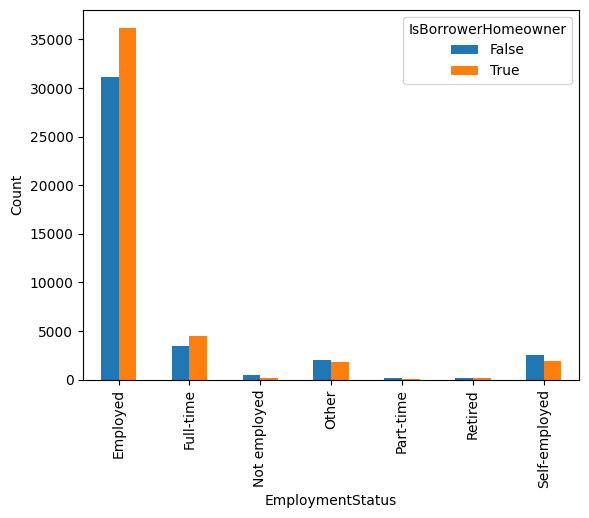

In [49]:
# Plot a grouped bar plot between EmploymentStatus and IsBorrowerHomeowner columns
cross_tab = pd.crosstab(df_cleaned['EmploymentStatus'], df_cleaned['IsBorrowerHomeowner'])
cross_tab.plot(kind='bar')
plt.xlabel('EmploymentStatus')
plt.ylabel('Count')
plt.legend(title='IsBorrowerHomeowner')
plt.show()


##  some multivariate graphs


In [50]:
numeric_col = df_cleaned.select_dtypes(include='number').columns
selected_features = df_cleaned[numeric_col].columns[:20].tolist()

selected_features.append('LoanAccepted')
selected_features

['ListingNumber',
 'Term',
 'BorrowerAPR',
 'BorrowerRate',
 'LenderYield',
 'EstimatedEffectiveYield',
 'EstimatedLoss',
 'EstimatedReturn',
 'ProsperRating (numeric)',
 'ProsperScore',
 'ListingCategory (numeric)',
 'EmploymentStatusDuration',
 'CreditScoreRangeLower',
 'CreditScoreRangeUpper',
 'CurrentCreditLines',
 'OpenCreditLines',
 'TotalCreditLinespast7years',
 'OpenRevolvingAccounts',
 'OpenRevolvingMonthlyPayment',
 'InquiriesLast6Months',
 'LoanAccepted']

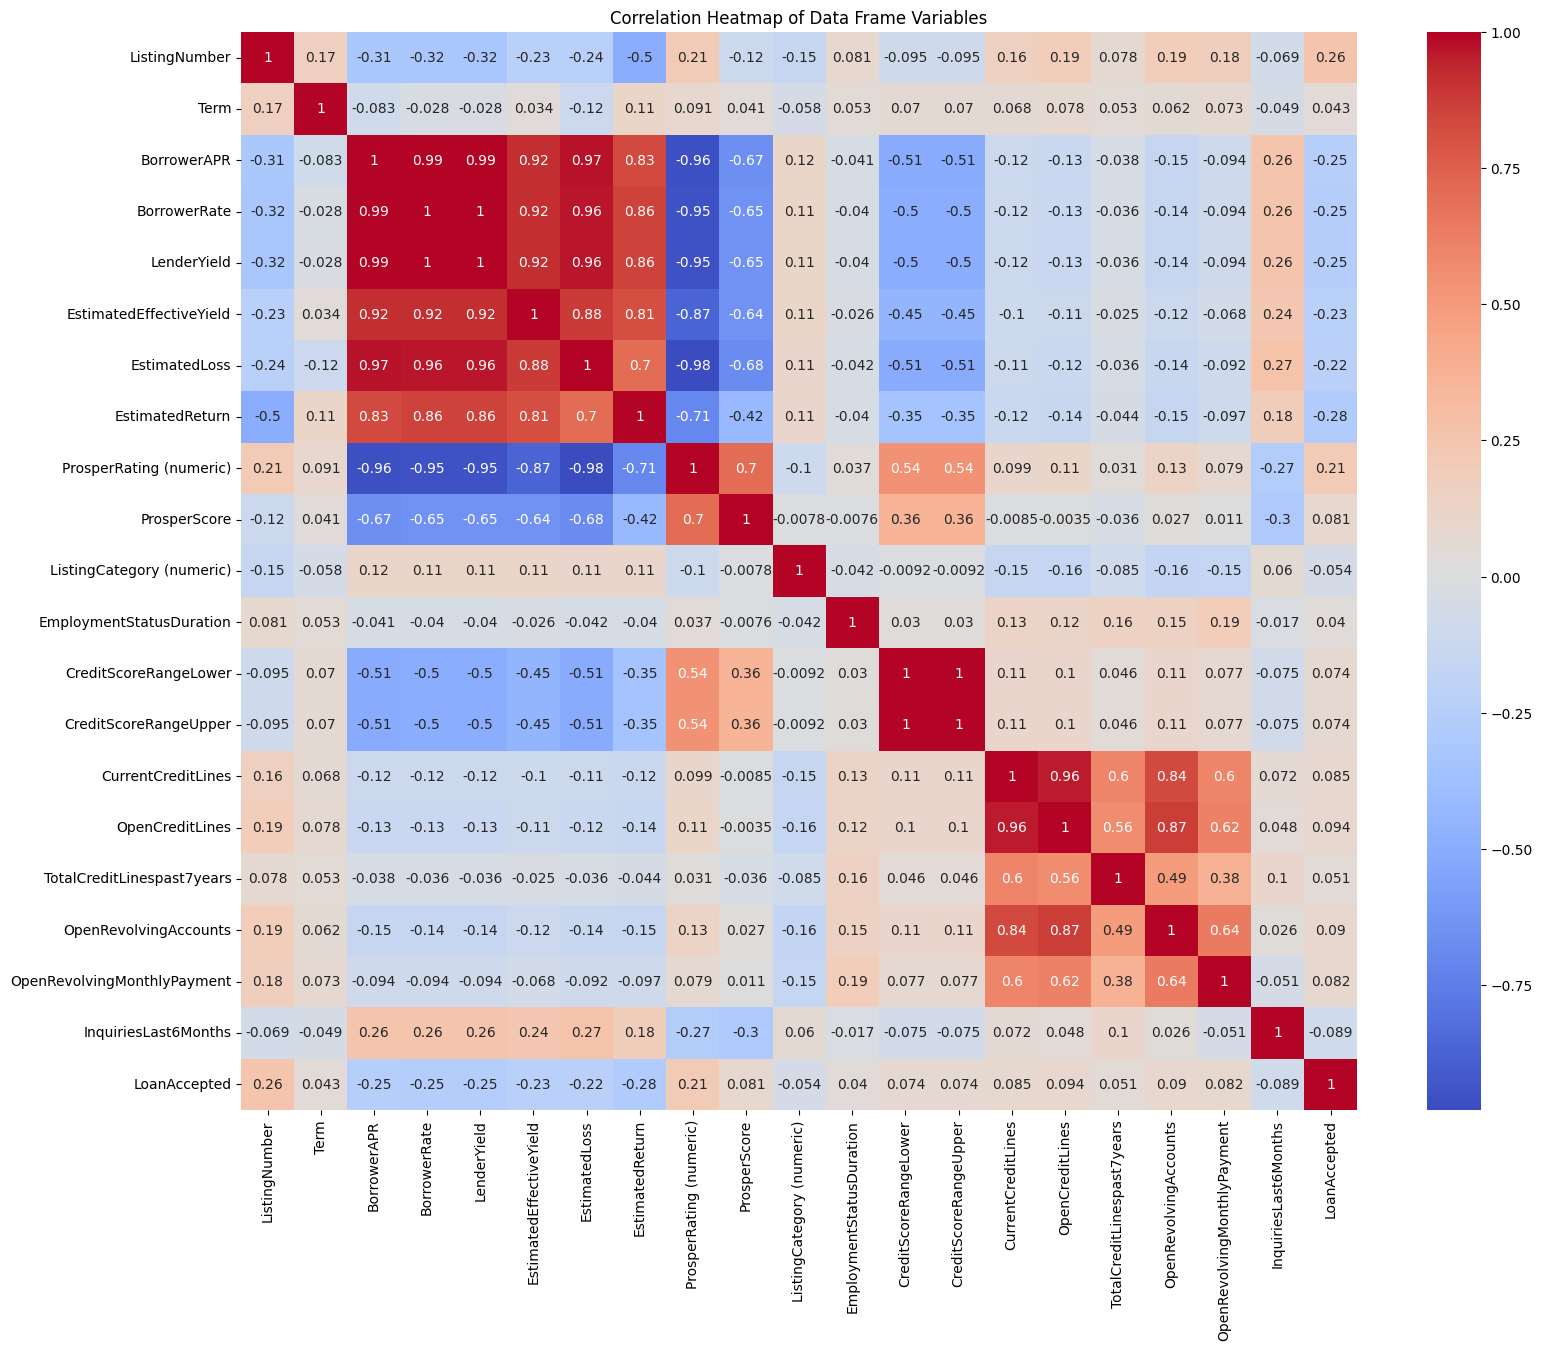

In [51]:
# Create a correlation matrix
corr_matrix = df_cleaned[selected_features].corr()

# Create a heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Customize the plot
plt.title('Correlation Heatmap of Data Frame Variables')
# plt.tight_layout()

# Display the heatmap
plt.show()

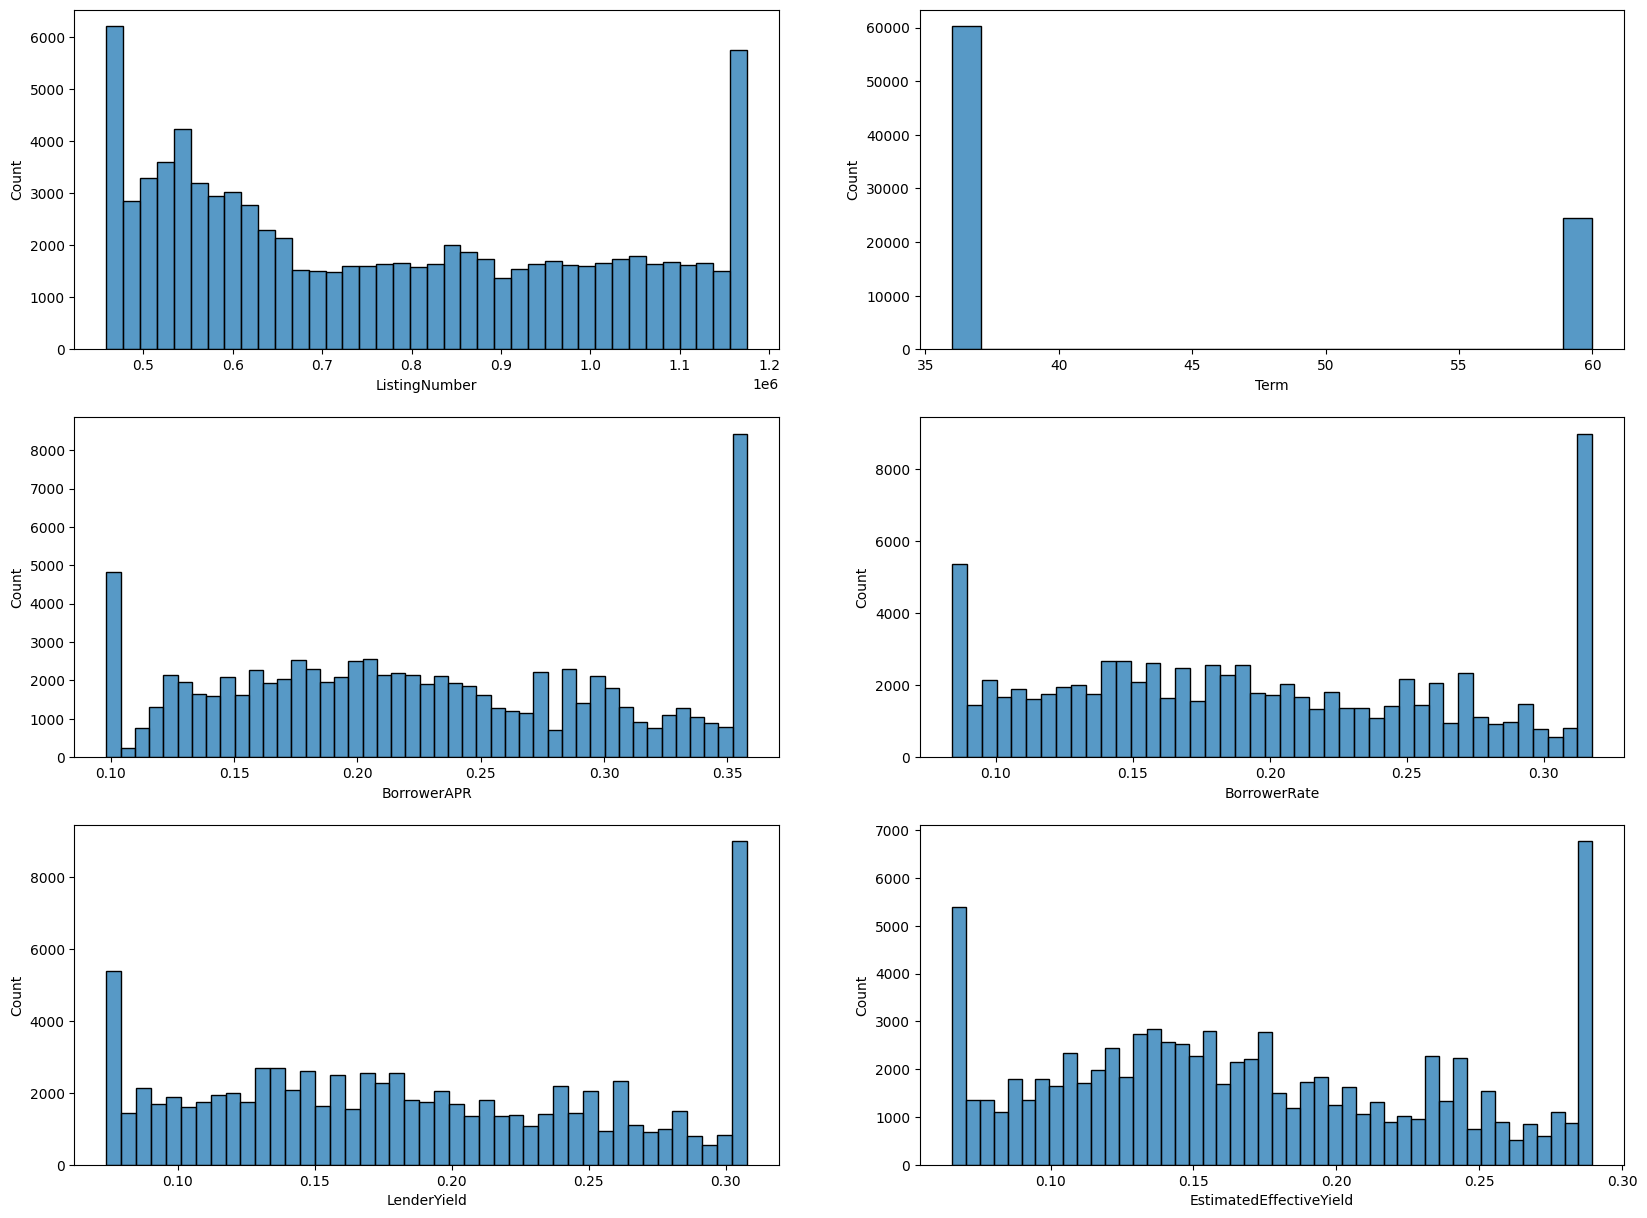

In [52]:
# some plot after scaling

plt.figure(figsize=(20,15))

for i in range(6):
    plt.subplot(3,2,i+1)
    sns.histplot(data=df_cleaned , x=numeric_col[i])

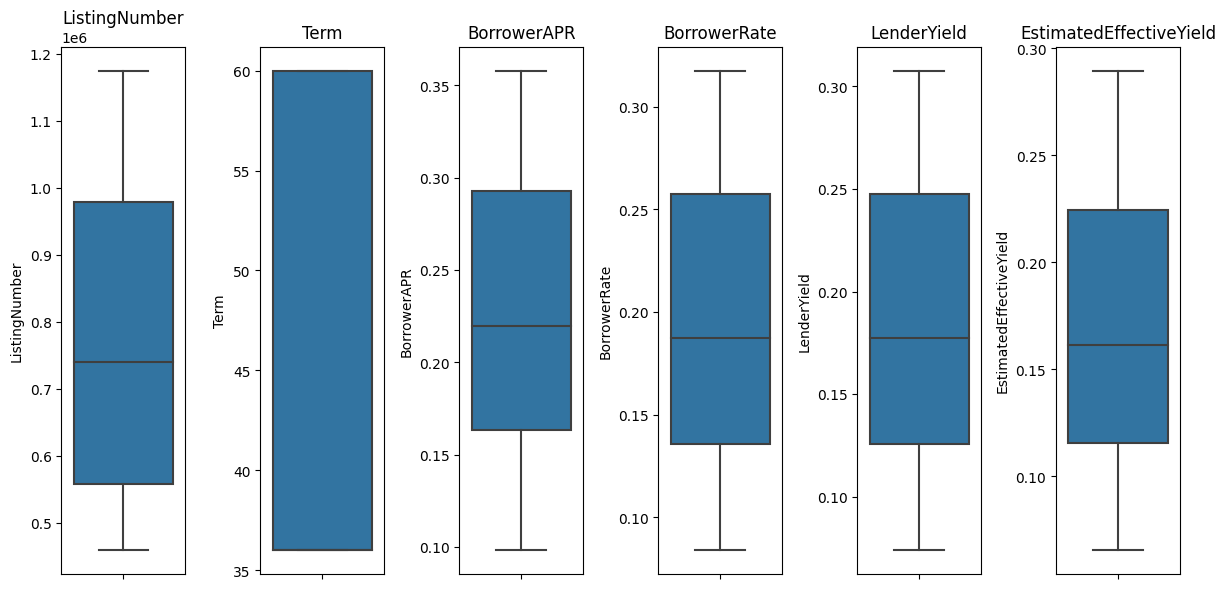

In [53]:
# box plot graphs

columns_to_plot = numeric_col[:6]

# Create a figure and axes
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(12, 6))

# Iterate over the selected columns and create box plots
for i, column in enumerate(columns_to_plot):
    sns.boxplot(y=df_cleaned[column], ax=axes[i])
    axes[i].set_title(column)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [54]:
df_cleaned.shape

(84853, 70)

# Data Encoding

In [55]:
# select the categorical columns

categorical_col = df_cleaned.select_dtypes(exclude='number').columns
categorical_col

Index(['ListingKey', 'ListingCreationDate', 'LoanStatus',
       'ProsperRating (Alpha)', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'IsBorrowerHomeowner', 'CurrentlyInGroup',
       'DateCreditPulled', 'FirstRecordedCreditLine', 'IncomeRange',
       'IncomeVerifiable', 'LoanKey', 'LoanOriginationDate',
       'LoanOriginationQuarter', 'MemberKey'],
      dtype='object')

In [56]:
# ListingKey, LoanKey, and MemberKey these columns are not helpful for analysis

df_cleaned = df_cleaned.drop(['ListingKey', 'LoanKey', 'MemberKey'], axis=1)

In [57]:
# show the unique values in the categorical columns

categorical_col = df_cleaned.select_dtypes(exclude='number').columns

for val in categorical_col:
    print(f'Coulmn {val} has values : {df_cleaned[val].unique()}')

Coulmn ListingCreationDate has values : ['2014-02-27 08:28:07.900000000' '2012-10-22 11:02:35.010000000'
 '2013-09-14 18:38:39.097000000' ... '2013-12-13 05:49:12.703000000'
 '2011-11-14 13:18:26.597000000' '2014-01-15 09:27:37.657000000']
Coulmn LoanStatus has values : ['Current' 'Past Due (1-15 days)' 'Defaulted' 'Completed' 'Chargedoff'
 'Past Due (16-30 days)' 'Past Due (61-90 days)' 'Past Due (31-60 days)'
 'Past Due (91-120 days)' 'FinalPaymentInProgress' 'Past Due (>120 days)']
Coulmn ProsperRating (Alpha) has values : ['A' 'D' 'B' 'E' 'C' 'AA' 'HR']
Coulmn BorrowerState has values : ['CO' 'GA' 'MN' 'NM' 'KS' 'CA' 'IL' 'MD' 'AL' 'AZ' 'VA' 'FL' 'PA' 'OR'
 'NY' 'LA' 'WI' 'OH' 'NC' 'WA' 'MI' 'NV' 'NJ' 'TX' 'AR' 'SC' 'DE' 'UT'
 'DC' 'MA' 'MO' 'CT' 'IN' 'KY' 'OK' 'MS' 'WV' 'RI' 'TN' 'ID' 'HI' 'NH'
 'NE' 'WY' 'AK' 'MT' 'VT' 'SD']
Coulmn Occupation has values : ['Professional' 'Skilled Labor' 'Executive' 'Sales - Retail' 'Laborer'
 'Food Service' 'Fireman' 'Construction' 'Computer Prog

In [58]:
# aggregate the date columns
Date_cols=['ListingCreationDate','DateCreditPulled','FirstRecordedCreditLine','LoanOriginationDate']

# aggregate the boolean columns
bool_cols=['IsBorrowerHomeowner','CurrentlyInGroup','IncomeVerifiable']


In [59]:
# add a new columns to the data frame with appropriate values include month and year

for col in Date_cols:
    df_cleaned[col + '_Month'] = pd.to_datetime(df_cleaned[col]).dt.month
    df_cleaned[col + '_Year'] = pd.to_datetime(df_cleaned[col]).dt.year

In [60]:
# drop the Date columns
df_cleaned = df_cleaned.drop(['ListingCreationDate','DateCreditPulled','FirstRecordedCreditLine','LoanOriginationDate'], axis=1)

In [61]:
df_cleaned.shape

(84853, 71)

In [62]:
df_cleaned.iloc[:,-9:]

,LoanAccepted,ListingCreationDate_Month,ListingCreationDate_Year,DateCreditPulled_Month,DateCreditPulled_Year,FirstRecordedCreditLine_Month,FirstRecordedCreditLine_Year,LoanOriginationDate_Month,LoanOriginationDate_Year
1,1,2,2014,2,2014,3,1996,3,2014
3,1,10,2012,10,2012,2,1983,11,2012
4,1,9,2013,9,2013,2,2004,9,2013
5,1,12,2013,12,2013,3,1973,12,2013
6,1,4,2013,4,2013,9,2000,4,2013
...,...,...,...,...,...,...,...,...,...
113932,1,4,2013,4,2013,9,1997,4,2013
113933,0,11,2011,11,2011,1,1992,11,2011
113934,1,12,2013,12,2013,2,2002,12,2013
113935,1,11,2011,11,2011,12,1993,11,2011


In [63]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 71 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ListingNumber                       84853 non-null  int64  
 1   Term                                84853 non-null  int64  
 2   LoanStatus                          84853 non-null  object 
 3   BorrowerAPR                         84853 non-null  float64
 4   BorrowerRate                        84853 non-null  float64
 5   LenderYield                         84853 non-null  float64
 6   EstimatedEffectiveYield             84853 non-null  float64
 7   EstimatedLoss                       84853 non-null  float64
 8   EstimatedReturn                     84853 non-null  float64
 9   ProsperRating (numeric)             84853 non-null  float64
 10  ProsperRating (Alpha)               84853 non-null  object 
 11  ProsperScore                        8485

In [64]:
df_cleaned['LoanAccepted'] = df_cleaned['LoanAccepted'].astype(int)

In [65]:
df_cleaned['LoanAccepted'].value_counts()

1    76240
0     8613
Name: LoanAccepted, dtype: int64

In [66]:
# make label encoder to the Boolean columns

encoder = LabelEncoder()

for col in bool_cols:
    df_cleaned[col] = encoder.fit_transform(df_cleaned[col])

df_cleaned[bool_cols]

,IsBorrowerHomeowner,CurrentlyInGroup,IncomeVerifiable
1,0,0,1
3,1,0,1
4,1,0,1
5,1,0,1
6,0,0,1
...,...,...,...
113932,1,0,1
113933,1,0,1
113934,1,0,1
113935,1,0,1


In [67]:
categorical_col = df_cleaned.select_dtypes(exclude='number').columns

for val in categorical_col:
    print(f'Coulmn {val} has values : {df_cleaned[val].unique()}')

Coulmn LoanStatus has values : ['Current' 'Past Due (1-15 days)' 'Defaulted' 'Completed' 'Chargedoff'
 'Past Due (16-30 days)' 'Past Due (61-90 days)' 'Past Due (31-60 days)'
 'Past Due (91-120 days)' 'FinalPaymentInProgress' 'Past Due (>120 days)']
Coulmn ProsperRating (Alpha) has values : ['A' 'D' 'B' 'E' 'C' 'AA' 'HR']
Coulmn BorrowerState has values : ['CO' 'GA' 'MN' 'NM' 'KS' 'CA' 'IL' 'MD' 'AL' 'AZ' 'VA' 'FL' 'PA' 'OR'
 'NY' 'LA' 'WI' 'OH' 'NC' 'WA' 'MI' 'NV' 'NJ' 'TX' 'AR' 'SC' 'DE' 'UT'
 'DC' 'MA' 'MO' 'CT' 'IN' 'KY' 'OK' 'MS' 'WV' 'RI' 'TN' 'ID' 'HI' 'NH'
 'NE' 'WY' 'AK' 'MT' 'VT' 'SD']
Coulmn Occupation has values : ['Professional' 'Skilled Labor' 'Executive' 'Sales - Retail' 'Laborer'
 'Food Service' 'Fireman' 'Construction' 'Computer Programmer' 'Other'
 'Sales - Commission' 'Retail Management' 'Engineer - Mechanical'
 'Military Enlisted' 'Clerical' 'Teacher' 'Clergy' 'Attorney' 'Nurse (RN)'
 'Accountant/CPA' 'Analyst' 'Investor' 'Flight Attendant' 'Nurse (LPN)'
 'Military 

In [68]:
# Perform one-hot encoding on the LoanStatus column
loan_status_encoded = pd.get_dummies(df_cleaned['LoanStatus'], prefix='LoanStatus')

# Concatenate the encoded columns with the original DataFrame
df_cleaned = pd.concat([df_cleaned, loan_status_encoded], axis=1)

# Drop the original LoanStatus column
df_cleaned.drop('LoanStatus', axis=1, inplace=True)

In [69]:
# ProsperRating (Alpha): Convert to numerical values using label encoding
label_encoder = LabelEncoder()

df_cleaned['ProsperRating (Alpha)'] = label_encoder.fit_transform(df_cleaned['ProsperRating (Alpha)'])

In [70]:
# Apply label encoder on the BorrowerState

label_encoder = LabelEncoder()

# Perform label encoding on the BorrowerState column
df_cleaned['BorrowerState'] = label_encoder.fit_transform(df_cleaned['BorrowerState'])

# Display the updated DataFrame
df_cleaned['BorrowerState'].head()

1     5
3    10
4    21
5    29
6    15
Name: BorrowerState, dtype: int64

In [71]:
# Perform label encoding on the Occupation column
df_cleaned['Occupation_encoded'] = label_encoder.fit_transform(df_cleaned['Occupation'])

df_cleaned = df_cleaned.drop(['Occupation'] , axis = 1)

In [72]:
# check the remaining categorical columns
categorical_col = df_cleaned.select_dtypes(exclude='number').columns

for val in categorical_col:
    print(f'Coulmn {val} has values : {df_cleaned[val].unique()}')

Coulmn EmploymentStatus has values : ['Employed' 'Other' 'Full-time' 'Self-employed' 'Not employed' 'Retired'
 'Part-time']
Coulmn IncomeRange has values : ['$50,000-74,999' '$25,000-49,999' '$100,000+' '$75,000-99,999'
 '$1-24,999' '$0']
Coulmn LoanOriginationQuarter has values : ['Q1 2014' 'Q4 2012' 'Q3 2013' 'Q4 2013' 'Q2 2013' 'Q2 2012' 'Q1 2013'
 'Q2 2010' 'Q1 2012' 'Q3 2012' 'Q4 2010' 'Q4 2011' 'Q2 2011' 'Q1 2011'
 'Q3 2009' 'Q3 2011' 'Q1 2010' 'Q4 2009' 'Q3 2010']


In [73]:
# EmploymentStatus: Apply one-hot encoding

encoded_employment = pd.get_dummies(df_cleaned['EmploymentStatus'], prefix='Employment')
df_cleaned = pd.concat([df_cleaned, encoded_employment], axis=1).drop(['EmploymentStatus'], axis=1)

In [74]:
# IncomeRange: Convert to numerical values using one hot encoding
encoded_income = pd.get_dummies(df_cleaned['IncomeRange'], prefix='income')
df_cleaned = pd.concat([df_cleaned, encoded_income], axis=1).drop(['IncomeRange'], axis=1)

In [75]:
# LoanOriginationQuarter: Apply label encoder

df_cleaned['LoanOriginationQuarter'] = label_encoder.fit_transform(df_cleaned['LoanOriginationQuarter'])

In [76]:
# shape the data frame after the encoding
df_cleaned.shape

(84853, 92)

In [77]:
# check if there categorical features in the Data Frame
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns

if len(categorical_columns) > 0:
    print("Categorical columns exist in the DataFrame.")
else:
    print("No categorical columns found in the DataFrame.")


No categorical columns found in the DataFrame.


In [78]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 92 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ListingNumber                       84853 non-null  int64  
 1   Term                                84853 non-null  int64  
 2   BorrowerAPR                         84853 non-null  float64
 3   BorrowerRate                        84853 non-null  float64
 4   LenderYield                         84853 non-null  float64
 5   EstimatedEffectiveYield             84853 non-null  float64
 6   EstimatedLoss                       84853 non-null  float64
 7   EstimatedReturn                     84853 non-null  float64
 8   ProsperRating (numeric)             84853 non-null  float64
 9   ProsperRating (Alpha)               84853 non-null  int64  
 10  ProsperScore                        84853 non-null  float64
 11  ListingCategory (numeric)           8485

In [79]:
# change the data type uint8 to int
uint8_columns = [col for col in df_cleaned.columns if df_cleaned[col].dtype == 'uint8']
len(uint8_columns)

df_cleaned[uint8_columns] = df_cleaned[uint8_columns].astype(int)

## Split the data working on the first target var only which is 'LoanStatus' Column

In [80]:
y = df_cleaned['LoanAccepted']
X = df_cleaned.drop(['LoanAccepted'] , axis=1)

#split the data into training and testing
X_train, X_test, y_train_LoanAccepted, y_test_LoanAccepted = train_test_split(X, y, test_size=0.2, random_state=0)


In [81]:
X_train.shape, X_test.shape, y_train_LoanAccepted.shape, y_test_LoanAccepted.shape

((67882, 91), (16971, 91), (67882,), (16971,))

## Perform FE using Mutual information score for the 'LoanAccepted' (the first target var)

In [82]:
# All discrete features should now have integer dtypes
# we should specify the int numbers because MI Score have a different calculations with int and float data types
is_discrete = X_train.dtypes == int

In [83]:
is_discrete

ListingNumber             True
Term                      True
BorrowerAPR              False
BorrowerRate             False
LenderYield              False
                         ...  
income_$1-24,999          True
income_$100,000+          True
income_$25,000-49,999     True
income_$50,000-74,999     True
income_$75,000-99,999     True
Length: 91, dtype: bool

## MI Score

In [84]:
# make a function to calculate the MI score for Feature Engineering process
# use mutual_info_classif Func because we work on classification target var
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X_train, y_train_LoanAccepted, is_discrete)
mi_scores[:20] # show a few features with their MI scores

LoanCurrentDaysDelinquent       0.309817
LoanNumber                      0.304870
ListingNumber                   0.304562
LP_GrossPrincipalLoss           0.202691
LP_NetPrincipalLoss             0.199948
LoanStatus_Chargedoff           0.167748
LoanStatus_Current              0.122957
BorrowerAPR                     0.055306
BorrowerRate                    0.054651
LenderYield                     0.053862
EstimatedReturn                 0.053522
LP_CustomerPrincipalPayments    0.053428
EstimatedEffectiveYield         0.052618
EstimatedLoss                   0.045506
LoanMonthsSinceOrigination      0.045336
LoanOriginationQuarter          0.044669
LP_CustomerPayments             0.044385
DateCreditPulled_Year           0.041406
LoanOriginationDate_Year        0.041182
ListingCreationDate_Year        0.041111
Name: MI Scores, dtype: float64

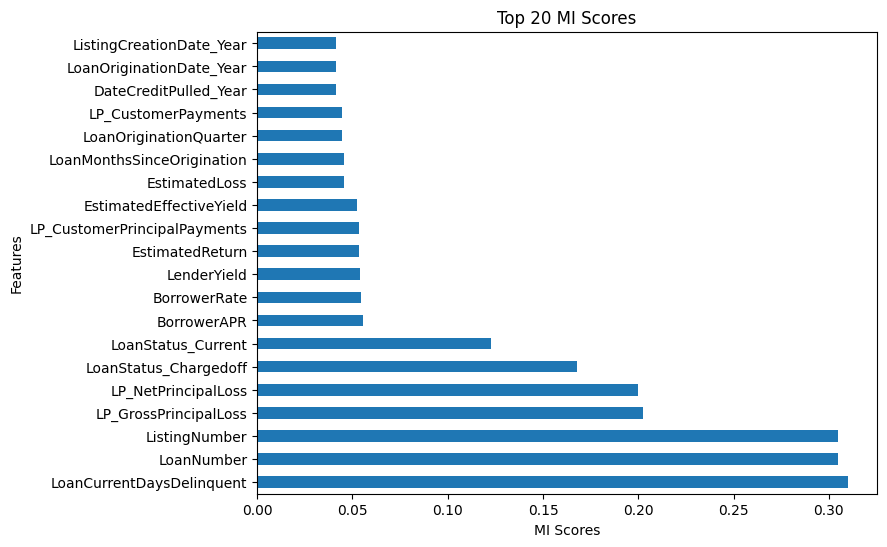

In [85]:
top_20_mi_scores = mi_scores.head(20)

# Create a horizontal bar plot
plt.figure(figsize=(8, 6))
top_20_mi_scores.plot(kind='barh')
plt.xlabel("MI Scores")
plt.ylabel("Features")
plt.title("Top 20 MI Scores")

plt.show()

In [86]:
# so we go with the largest 10 MI Scores Columns for the modeling

In [87]:
X_new_train = X_train[mi_scores.index[:10]]
X_new_test = X_test[mi_scores.index[:10]]
X_new_train

,LoanCurrentDaysDelinquent,LoanNumber,ListingNumber,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LoanStatus_Chargedoff,LoanStatus_Current,BorrowerAPR,BorrowerRate,LenderYield
8347,0,103157,908745,0.0,0.0,0,1,0.17090,0.1349,0.1249
21258,0,121122,1040194,0.0,0.0,0,1,0.30131,0.2624,0.2524
99866,0,104370,946926,0.0,0.0,0,1,0.24754,0.2225,0.2125
54925,0,87867,743506,0.0,0.0,0,0,0.20053,0.1639,0.1539
96768,0,103046,916273,0.0,0.0,0,1,0.22601,0.2015,0.1915
...,...,...,...,...,...,...,...,...,...,...
28543,0,72773,625232,0.0,0.0,0,1,0.35797,0.3177,0.3077
61662,0,102489,908487,0.0,0.0,0,1,0.23318,0.2085,0.1985
57214,0,104226,926745,0.0,0.0,0,1,0.17090,0.1349,0.1249
58522,0,129167,1148111,0.0,0.0,0,1,0.27776,0.2394,0.2294


In [88]:
X_new_test

,LoanCurrentDaysDelinquent,LoanNumber,ListingNumber,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LoanStatus_Chargedoff,LoanStatus_Current,BorrowerAPR,BorrowerRate,LenderYield
93582,283,42786,458873,767.47,727.46,1,0,0.35797,0.3177,0.3077
99760,0,97662,858726,0.00,0.00,0,1,0.27285,0.2346,0.2246
79681,0,65465,587292,0.00,0.00,0,1,0.28704,0.2610,0.2510
23472,0,99650,875187,0.00,0.00,0,1,0.15324,0.1249,0.1149
55667,0,103242,925275,0.00,0.00,0,1,0.20626,0.1695,0.1595
...,...,...,...,...,...,...,...,...,...,...
107799,0,54088,529324,0.00,0.00,0,1,0.20200,0.1799,0.1699
26737,0,42786,458873,0.00,0.00,0,0,0.21738,0.1800,0.1700
73791,0,95373,835852,0.00,0.00,0,1,0.27285,0.2346,0.2246
78790,0,85410,708881,0.00,0.00,0,0,0.23121,0.1939,0.1839


# Modeling Phase

## First Target Variable ( LoanAccepted ) Using Logistic Regression Model

In [89]:
classifer_LR = LogisticRegression(random_state=0)
scaler = StandardScaler()

my_pipeline_1 = Pipeline(steps=[
('scaler' , scaler),
('model', classifer_LR)])

my_pipeline_1.fit(X_new_train , y_train_LoanAccepted)
pred_1 = my_pipeline_1.predict(X_new_test)

Acc = accuracy_score(y_test_LoanAccepted,pred_1)
print('.:. Logistic Regression Model Accuracy:'+'\033[1m {:.2f}%'.format(Acc*100)+' .:.')

.:. Logistic Regression Model Accuracy: 99.26% .:.


In [90]:
pred_1

array([0, 1, 1, ..., 1, 1, 1])

In [91]:
cm_logistic = pd.DataFrame(confusion_matrix(y_test_LoanAccepted,pred_1))
cm_logistic

,0,1
0,1643,126
1,0,15202


In [92]:
# Print precision, recall, and F1-score for all classes
print(classification_report(y_test_LoanAccepted, pred_1))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1769
           1       0.99      1.00      1.00     15202

    accuracy                           0.99     16971
   macro avg       1.00      0.96      0.98     16971
weighted avg       0.99      0.99      0.99     16971



### Perform Cross-validation to check the over fitting in Logistic Regression Model

In [93]:
# To evaluate the performance and generalization ability of the model

scores = cross_val_score(estimator=classifer_LR, X=X_new_train, y=y_train_LoanAccepted, cv=5)

In [94]:
print('Cross-validation scores:', scores)
print('Mean cross-validation score:', scores.mean())
print('Standard deviation of cross-validation scores:', scores.std())

Cross-validation scores: [0.99543345 0.99587538 0.99580141 0.99543312 0.9956541 ]
Mean cross-validation score: 0.9956394916200484
Standard deviation of cross-validation scores: 0.00018282033611428353


#####  the model has achieved excellent performance with an average accuracy of approximately 99.7%

## Second & Third Target Variables ( ROI ) and (EMI) Using Linear Regression and Random Forest Regressor models

In [95]:
# Calculate ROI
df_cleaned['ROI'] = (df_cleaned['LP_CustomerPrincipalPayments'] + df_cleaned['LP_GrossPrincipalLoss'] - df_cleaned['LoanOriginalAmount']) / df_cleaned['LoanOriginalAmount']

# Calculate EMI based on the corresponding columns 'LoanOriginalAmount', 'BorrowerRate', and 'Term'
df_cleaned['EMI'] = (df_cleaned['LoanOriginalAmount'] * (df_cleaned['BorrowerRate'] / 100 / 12) * (1 + (df_cleaned['BorrowerRate'] / 100 / 12))**(df_cleaned['Term'] * 12)) / (((1 + (df_cleaned['BorrowerRate'] / 100 / 12))**(df_cleaned['Term'] * 12)) - 1)


In [97]:
y = df_cleaned[['ROI', 'EMI']]
X = df_cleaned.drop(['ROI', 'EMI'], axis=1)

#split the data into training and testing
X_train, X_test, y_train_ROI_EMI, y_test_ROI_EMI = train_test_split(X, y, test_size=0.2, random_state=0)

In [98]:
y.describe()

,ROI,EMI
count,84853.000000,84853.000000
mean,-0.607763,17.885775
std,0.381626,11.102772
min,-1.000000,2.850924
25%,-0.940645,9.622701
50%,-0.791514,14.774780
75%,-0.248100,23.831271
max,0.458240,48.551739


In [144]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

# perform feature selection for the 'ROI' variable
selector_roi = SelectKBest(mutual_info_regression, k=10)
X_train_new_roi = selector_roi.fit_transform(X_train, y_train_ROI_EMI['ROI'])
X_test_new_roi = selector_roi.transform(X_test)
selected_features_roi = X_train.columns[selector_roi.get_support()]

# perform feature selection for the 'EMI' variable
selector_emi = SelectKBest(mutual_info_regression, k=10)
X_train_new_emi = selector_emi.fit_transform(X_train, y_train_ROI_EMI['EMI'])
X_test_new_emi = selector_emi.transform(X_test)
selected_features_emi = X_train.columns[selector_emi.get_support()]

# combine the selected features for both variables
selected_features = set(selected_features_roi) | set(selected_features_emi)

# print the names of the selected columns
print("Selected columns:", selected_features)


Selected columns: {'BorrowerAPR', 'EstimatedReturn', 'EstimatedEffectiveYield', 'MonthlyLoanPayment', 'LP_CustomerPrincipalPayments', 'LP_CustomerPayments', 'LoanOriginalAmount', 'LoanMonthsSinceOrigination', 'LenderYield', 'BorrowerRate', 'EstimatedLoss', 'LP_ServiceFees'}


In [145]:
Selected_columns = ['BorrowerAPR', 'EstimatedReturn', 'EstimatedEffectiveYield', 'MonthlyLoanPayment',
                    'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LoanOriginalAmount', 'LoanMonthsSinceOrigination',
                    'LenderYield', 'BorrowerRate', 'EstimatedLoss', 'LP_ServiceFees']

y = df_cleaned[['ROI', 'EMI']]
X = df_cleaned[Selected_columns]

#split the data into training and testing
X_train, X_test, y_train_ROI_EMI, y_test_ROI_EMI = train_test_split(X, y, test_size=0.2, random_state=0)

## Perform PCA

In [146]:
train = X_train
test =  X_test

scaler1 = StandardScaler()

train_scaled = scaler1.fit_transform(train)
test_scaled = scaler1.transform(test)

pca = PCA(n_components=10)

pca_train = pca.fit_transform(train_scaled)
pca_test = pca.transform(test_scaled)

# The explained variance ratio: indicates how much information each principal component captures from the original data.
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.cumsum(explained_var_ratio)
print("Explained Variance Ratio:")
print(explained_var_ratio)
print("\nCumulative Explained Variance:")
print(cumulative_var_ratio)

Explained Variance Ratio:
[0.50574699 0.25943889 0.1367158  0.0388822  0.02917308 0.01785396
 0.00655477 0.00395092 0.00073435 0.0005789 ]

Cumulative Explained Variance:
[0.50574699 0.76518588 0.90190168 0.94078388 0.96995696 0.98781092
 0.9943657  0.99831662 0.99905097 0.99962987]


## Using Pipeline

In [148]:
# using StandardScaler for scaling the data
stdscaler = StandardScaler()

# models we use
lin_model = LinearRegression()
ridge_model = Ridge(random_state=42)
forest_model = RandomForestRegressor(random_state=42)

In [149]:
models = [{'Linear Regression': lin_model}, {'Random Forest': forest_model} ,{'Ridge Regression':ridge_model}]

predictions = []
for i in models:
    for key, value in i.items():
        my_pipeline_2 = Pipeline(steps=[
        ('stdscaler' , stdscaler),
        ('pca', pca),
        ('model', value)])
        my_pipeline_2.fit(X_train , y_train_ROI_EMI)
        pred_2 = my_pipeline_2.predict(X_test)

        accuracy = my_pipeline_2.score(X_test, y_test_ROI_EMI).round(3)
        mae = mean_absolute_error(y_test_ROI_EMI , pred_2).round(3)

        predictions.append(pred_2)

        print(f'Model {key} Accuracy: {accuracy * 100 }%')
        print(f'Model {key} MAE: {mae}')
        print('-'*40)


Model Linear Regression Accuracy: 88.3%
Model Linear Regression MAE: 0.954
----------------------------------------
Model Random Forest Accuracy: 98.8%
Model Random Forest MAE: 0.144
----------------------------------------
Model Ridge Regression Accuracy: 88.3%
Model Ridge Regression MAE: 0.954
----------------------------------------


In [150]:
pred_2

array([[-0.3148389 ,  6.37798912],
       [-0.75794944,  9.00457262],
       [-0.86979478, 23.34900882],
       ...,
       [-0.81116271, 23.36547093],
       [-0.16158529, 23.96724648],
       [-0.94688532, 34.2230747 ]])

### perform cross-validation on the Ridge Regression

In [151]:
scores = cross_val_score(estimator=ridge_model, X=pca_train, y=y_train_ROI_EMI, cv=5)

print('Cross-validation scores:', scores)
print('Mean cross-validation score:', scores.mean())
print('Standard deviation of cross-validation scores:', scores.std())

Cross-validation scores: [0.88209579 0.88413729 0.88060283 0.88133459 0.88223154]
Mean cross-validation score: 0.8820804085568172
Standard deviation of cross-validation scores: 0.0011826518276320096


# Deployment

In [152]:
import pickle

In [154]:
pickle.dump(my_pipeline_1,open('/content/Logistic_model_saved','wb'))

In [153]:
pickle.dump(my_pipeline_2,open('/content/Linear_model_saved','wb'))

In [155]:
model1_loaded = pickle.load(open('/content/Logistic_model_saved','rb'))

In [156]:
model2_loaded = pickle.load(open('/content/Linear_model_saved','rb'))

In [157]:
model1_loaded.predict(X_new_test)

array([0, 1, 1, ..., 1, 1, 1])

In [148]:
X_new_test

,LoanCurrentDaysDelinquent,LoanNumber,ListingNumber,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LoanStatus_Chargedoff,LoanStatus_Current,BorrowerAPR,BorrowerRate,LenderYield
93582,283,42786,458873,767.47,727.46,1,0,0.35797,0.3177,0.3077
99760,0,97662,858726,0.00,0.00,0,1,0.27285,0.2346,0.2246
79681,0,65465,587292,0.00,0.00,0,1,0.28704,0.2610,0.2510
23472,0,99650,875187,0.00,0.00,0,1,0.15324,0.1249,0.1149
55667,0,103242,925275,0.00,0.00,0,1,0.20626,0.1695,0.1595
...,...,...,...,...,...,...,...,...,...,...
107799,0,54088,529324,0.00,0.00,0,1,0.20200,0.1799,0.1699
26737,0,42786,458873,0.00,0.00,0,0,0.21738,0.1800,0.1700
73791,0,95373,835852,0.00,0.00,0,1,0.27285,0.2346,0.2246
78790,0,85410,708881,0.00,0.00,0,0,0.23121,0.1939,0.1839


In [158]:
model2_loaded.predict(X_test)

array([[-0.3148389 ,  6.37798912],
       [-0.75794944,  9.00457262],
       [-0.86979478, 23.34900882],
       ...,
       [-0.81116271, 23.36547093],
       [-0.16158529, 23.96724648],
       [-0.94688532, 34.2230747 ]])